In [3]:
import numpy as np # NumPy
import matplotlib.pylab as plt # Matplotlib plots
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import mpl_scatter_density     # density scatter plots
import pandas as pd # Pandas
import uproot
import pickle
import logging
import subprocess

import os # read directories etc.
from scipy.signal import find_peaks, gaussian
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
import pylandau

import time
from timeout_decorator import timeout

# from importlib import reload # to reload modules
# import modules.LoadBatch
# reload(modules.LoadBatch)
from modules.LoadBatch import *
from modules.SensorClasses import Batch, Sensor, Oscilloscope
from modules.SingleBatch import analysis_batch


In [4]:
pd.set_option('display.max_columns', None)
# logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] - %(message)s')
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] - \t %(message)s')
# plt.rcParams['text.usetex'] = True   ### LateX in matplotlib

In [4]:
# plt.style.use(hep.atlas.style.ATLAS)

### Bins options, sensors and runs import

In [7]:
### Load the dictionary of sensor names and runs
dict_of_batches = read_pickle("./files/dict_of_batches.pickle")

### presentation path
# pres_path = '/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Presentations/2024-02-15 for fast-silicon-pixel'

ROOT_fit_dir = f"./ROOT_Langaus_fit/"


In [8]:
list_of_batches = list(dict_of_batches.keys())
list_of_batches.sort()
print(list_of_batches)

[100, 101, 199, 201, 202, 203, 204, 205, 206, 301, 401, 402, 403, 406, 407, 408, 409, 410, 411, 413, 414, 501, 502, 504, 505, 601, 602, 603, 604, 605, 701, 702, 801, 802, 901, 902, 1001, 1002, 1101, 1102, 1201, 1202, 5031, 5032]


## Plot a single batch or multiple batches in a row
(just put a list, or one, of the batches to plot in `for this_batch in []:`)

In [37]:
### decide options about the batch
this_batch = 100
SAVE = False
show_plots = True
fit_charge = False
CFD_comparison_plots = False

single_batch_run = ['python3', 'Single_batch.py', '--batch', f'{this_batch}']

if SAVE: single_batch_run.append("--SAVE")
if show_plots: single_batch_run.append("--show_plots")
if fit_charge: single_batch_run.append(" -fit_charge")
if CFD_comparison_plots: single_batch_run.append("--CFD")

subprocess.run(single_batch_run)


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 100, SAVE: False, show_plot: True, fit_charge: False, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 100, S1
[INFO] - 	 Loading batch 100 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -32.87°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.14258318e+02 -5.94812738e+03  7.20665010e+01  2.00161704e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.46772184e+02 -6.15207774e+03  6.22979029e+01  3.08417438e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.52752215e+02 -6.03342061e+03  5.36228771e+01  5.67786035e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [  279.59722614 -5952.90748802    74.52072647    93.16790984]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density

Figure(3600x1200)
DUT_1
DUT_2
DUT_3
Figure(3600x2400)
Figure(3600x1200)
Figure(7200x2400)
Figure(7200x2400)
Figure(7200x2400)
Figure(3600x2400)
Figure(3600x2400)
Figure(3600x1200)
Figure(3600x1200)
TOTAL TIME: 0 min and 48.57 sec
Figure(3000x1800)
Figure(3000x1800)
Figure(3000x1800)
Figure(3600x1200)
DUT_1
DUT_2
DUT_3
Figure(3600x2400)
Figure(3600x1200)
Figure(7200x2400)
Figure(7200x2400)
Figure(7200x2400)
Figure(3600x2400)
Figure(3600x2400)
Figure(3600x1200)
Figure(3600x1200)
TOTAL TIME: 0 min and 49.32 sec


CompletedProcess(args=['python3', 'Single_batch.py', '--batch', '100', '--show_plots'], returncode=0)

### Alternative it the function above doesn't work
Or if it's necessary to change specific things

In [ ]:
# ### show all information about the batch
# SAVE = True
# show_plot = False

# colormap = ['k','b','g','r']

# binning_method = 'rice'
# threshold_charge = 4 #fC
# charge_bins = 500
# eff_lim = (0.4,1)
# # MCP_resolution = 36.52
# time_bins = 4000
# window_limit = 20e3
# n_bootstrap = 50
# CFD_values = (20, 50, 70)
# axes_size = len(CFD_values)

# start = time.time()

# for this_batch in [100, 101, 199]:

#     dir_path = f'/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/{this_batch}'

#     display(dict_of_batches[this_batch].__dict__)
#     if not os.path.exists(dir_path):
#         os.mkdir(dir_path)

#     info_dict = {}
#     ### show all informations about each sensor
#     for S in ['S1','S2']:
#         if dict_of_batches[this_batch].S[S] is None:
#             logging.warning(f"No oscilloscope {S} in batch {this_batch}")
#             info_dict[(S,ch)] = None
#         else:
#             for ch, sensor in dict_of_batches[this_batch].S[S].channels.items():
#                 info_dict[(S,ch)] = sensor.__dict__
#     info_df = pd.DataFrame(info_dict)
#     display(info_df)
#     # Export DataFrame to a CSV file
#     info_df.to_csv(os.path.join(dir_path,f'table_data_{this_batch}.csv'), index=True)
   
#     print("Batch: ", this_batch)

#     ### save in a presentation folder
#     # dir_path = pres_path

#     df = {}  # dictionary containing the two dataframes of the two oscilloscopes
#     # 'pulseheight' or 'time'
#     if this_batch in [502, 601, 602, 603, 604, 605, 901, 902, 1001, 1002]:
#         use_for_geometry_cut = 'time'
#     else:
#         use_for_geometry_cut = 'pulseheight' 

#     these_bins = bins_dict[this_batch] #bins1    ### custom bins around the sensors
    
#     for S in ['S1','S2']: #"S2" ### the two scopes
#         print(S)
        
#         DUTs = get_DUTs_from_dictionary(info_dict,S)
# #         DUTs = [2]
#         if not DUTs: continue   ### if there are no DUTs in this oscilloscope just go to next

#         df[S] = load_batch(this_batch,S)
#         print(f'MCP: {dict_of_batches[this_batch].S[S].channels["Ch1"].voltage} V, angle: {dict_of_batches[this_batch].angle}°', 'temperature:%.2f°C'%dict_of_batches[this_batch].temperature)

#         ## show full area
#         plot(df[S], "2D_Tracks", dict_of_batches[this_batch], S, bins=large_bins,
#              n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} all tracks (no cut)', savefig_path=dir_path, fmt='png', show_plot=show_plot)  
        
#         ### I PUT THE TRANSIMPEDANCE TO 4700 MANUALLY
#         my_transimpedance = 4700 #4700 or 10700

#         ###[ ... if dut in DUTs else None for dut in [1,2,3]], it avoids calculating the cuts for the channels with no dut
#         geo_cuts = [geometry_mask(df[S], DUT_number=dut, bins=these_bins, bins_find_min='rice', use=use_for_geometry_cut)[0] if dut in DUTs else None for dut in [1,2,3]]
#         central_sensor_area_cuts = [geometry_mask(df[S], DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='center', use=use_for_geometry_cut)[0] if dut in DUTs else None for dut in [1,2,3]]
#         time_cuts = [time_mask(df[S], dut, bins=time_bins, mask=geo_cuts[dut-1], n_bootstrap=False, plot=False, savefig=os.path.join(dir_path,f'time_plot_with_geo_cuts_{S}_{this_batch}_DUT{dut}.png'))[0] if dut in DUTs else None for dut in [1,2,3]]
#         charge_cut = [df[S][f'charge_{dut}']/my_transimpedance>threshold_charge if dut in DUTs else None for dut in [1,2,3]]
        
#         ### time resolution fit
#         [time_mask(df[S], dut, bins=time_bins, n_bootstrap=n_bootstrap, mask=np.logical_and(geo_cuts[dut-1],charge_cut[dut-1]), plot=True,
#                                      savefig=os.path.join(dir_path,f'time_plot_with_geo_cuts_{S}_{this_batch}_DUT{dut}.png'))[1]['parameters'] if dut in DUTs else None for dut in [1,2,3]]
#         ### time resolution fit with central area cuts
#         [time_mask(df[S], dut, bins=time_bins, n_bootstrap=n_bootstrap, mask=np.logical_and(central_sensor_area_cuts[dut-1],charge_cut[dut-1]), plot=True, title_info=' center cut',
#                                      savefig=os.path.join(dir_path,f'time_plot_with_center_cuts_{S}_{this_batch}_DUT{dut}.png'))[1]['parameters'] if dut in DUTs else None for dut in [1,2,3]]
    
#         ### I still need pulseHeight cut for the charge fit
#         mins = [find_min_btw_peaks(df[S][f"pulseHeight_{dut}"], bins='rice', plot=False) if dut in DUTs else None for dut in [1,2,3]]
#         pulse_cuts = [df[S][f'pulseHeight_{dut}']>mins[dut-1] if dut in DUTs else None for dut in [1,2,3]]
#         for dut in [1,2,3]:
#             if (pulse_cuts[dut-1] is not None) and (np.alltrue(pulse_cuts[dut-1]==False)):
#                 pulse_cuts[dut-1] = pd.Series(True, index=df[S].index)
#             if use_for_geometry_cut == "time":   ### also NOT APPLY a pulseHeight cut if I choose time for geometry cut
#                 pulse_cuts[dut-1] = pd.Series(True, index=df[S].index)
#         ### charge distribution with cuts saved into a file and the fitted with ROOT Landau*Gauss convolution
#         all_cuts = [np.logical_and(np.logical_and(geo_cuts[dut-1], time_cuts[dut-1]), pulse_cuts[dut-1]) 
#                     if dut in DUTs else None for dut in [1,2,3]]
#         for dut in DUTs:
#             np.savetxt(os.path.join(dir_path, f"charge_data_all_cuts_{this_batch}_{S}_{dut}.csv"),
#                        df[S][f'charge_{dut}'].loc[all_cuts[dut-1]]/my_transimpedance, delimiter=',')
#             os.chdir(ROOT_fit_dir)
#             run_root_string = f'root -b -q "charge_fit.C({this_batch},\\"{S}\\",{dut})"'
#             os.system(run_root_string)
            
#         ## highlight the sensors with pulseHeight cut
#         plot(df[S], "2D_Sensors", dict_of_batches[this_batch], S, bins=these_bins, bins_find_min=binning_method,
#              n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} (pulseHeight cut)', savefig_path=dir_path, fmt='png')    
#         ### highlight the sensors with time cut
#         plot(df[S], "2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, mask=time_cuts,
#              n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} (w. time cut)', savefig_path=dir_path, fmt='png')
#         # delta time vs pulseHeight w/ info
#         plot(df[S], "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins,
#              n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} ', savefig_path=dir_path, fmt='png')
#         ### delta time vs pulseHeight no info
#         plot(df[S], "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False,
#              n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} no info', savefig_path=dir_path, fmt='png') 
#         ### delta time vs pulseHeight central area no info
#         plot(df[S], "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False, mask=central_sensor_area_cuts,
#              n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} central area', savefig_path=dir_path, fmt='png')
#         ### efficiency projection whole sensor (zooomed)
#         plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, zoom_to_sensor=True, efficiency_lim=eff_lim,
#             bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} threshold charge {threshold_charge}fC', savefig_path=dir_path)
#         ### with time cut in the center (zoomed)
#         plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='center', use=use_for_geometry_cut, mask=time_cuts, zoom_to_sensor=True, efficiency_lim=eff_lim,
#             bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} threshold charge {threshold_charge}fC (center and time cut)', savefig_path=dir_path)
#         ### 2D efficiency
#         plot(df[S], "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, zoom_to_sensor=True,
#             bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} thresh charge {threshold_charge}fC', savefig_path=dir_path, fmt='png')
#         ### with time cut and zoomed
#         plot(df[S], "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, mask=time_cuts, zoom_to_sensor=True,
#             bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} thresh charge {threshold_charge}fC (center and time cut)', savefig_path=dir_path, fmt='png')    
#         plt.close('all')
#     ### CFD values comparison with normal geo cuts
#         CFD_mask = [np.logical_and(charge_cut[dut-1], geo_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]
#         for dut in DUTs:
#             fig, _ = plot(df[S], 'CFD_comparison', dict_of_batches[this_batch], S, n_DUT=dut, CFD_values=CFD_values, mask=CFD_mask, time_bins=time_bins,
#                  savefig=SAVE, savefig_path=dir_path, savefig_details=f" geo cuts")
#             plt.close(fig)
#     ### CFD values comparison with central area cuts (less statistics)
#         CFD_mask = [np.logical_and(charge_cut[dut-1], central_sensor_area_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]
#         for dut in DUTs:
#             fig, _ = plot(df[S], 'CFD_comparison', dict_of_batches[this_batch], S, n_DUT=dut, CFD_values=CFD_values, mask=CFD_mask,
#                  savefig=SAVE, savefig_path=dir_path, savefig_details=f" central area cuts")
#             plt.close(fig)
# #         print(df['S1'].memory_usage(deep=True))
#     del df['S1']
#     del df['S2']
#     del df

# stop = time.time()
# print(f"TOTAL TIME: {(stop-start)//60:.0f} min and {(stop-start)%60:.2f} sec")

# Plot multiple batches
Call One_batch.py with the batch number as argument, to make sure that the memory doesn't leak


In [8]:
### decide options about the batch
SAVE = True
show_plots = False
fit_charge = True
CFD_comparison_plots = False

for this_batch in list_of_batches:
    single_batch_run = ['python3', 'Single_batch.py', '--batch', f'{this_batch}']

    if SAVE: single_batch_run.append("--SAVE")
    if show_plots: single_batch_run.append("--show_plots")
    if fit_charge: single_batch_run.append("--fit_charge")
    if CFD_comparison_plots: single_batch_run.append("--CFD")

    subprocess.run(single_batch_run)    

[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 100, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 100, S1
[INFO] - 	 Loading batch 100 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -32.87°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.14258318e+02 -5.94812738e+03  7.20665010e+01  2.00161704e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.46772184e+02 -6.15207774e+03  6.22979029e+01  3.08417438e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.52752215e+02 -6.03342061e+03  5.36228771e+01  5.67786035e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(100,"S1",1)...
size: 3855
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       45.682
NDf                       =           43
Edm                       =  4.14133e-06
NCalls                    =          201
Width                     =     0.728943   +/-   0.0364618    	 (limited)
MP                        =       12.397   +/-   0.0679246    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/100/charge_data_all_cuts_100_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(100,"S1",2)...
size: 5391
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      62.4264
NDf                       =           44
Edm                       =   6.8758e-07
NCalls                    =          208
Width                     =     0.648275   +/-   0.0333154    	 (limited)
MP                        =      12.9382   +/-   0.0761232    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/100/charge_data_all_cuts_100_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(100,"S1",3)...
size: 10034
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      74.2533
NDf                       =           37
Edm                       =  5.07457e-08
NCalls                    =          379
Width                     =     0.608309   +/-   0.0191381    	 (limited)
MP                        =      10.4948   +/-   0.0387187   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/100/charge_data_all_cuts_100_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [  279.59722614 -5952.90748802    74.52072647    93.16790984]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [  555.44203345 -6154.47821141    65.61294102    91.77362229]
[INFO] - 	 in 'time_mask()': Fit parameters [  860.76839832 -6035.39947679    56.17965548    92.09835606]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.06655157e+01 -5.94620968e+03  6.26960691e+01  7.38159095e-01]
[INFO] - 	 in a

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(100,"S2",1)...
size: 5206
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      53.8592
NDf                       =           36
Edm                       =  1.01244e-08
NCalls                    =          395
Width                     =     0.619752   +/-   0.026336     	 (limited)
MP                        =      10.0957   +/-   0.0481275    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/100/charge_data_all_cuts_100_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(100,"S2",2)...
size: 18411
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      54.6708
NDf                       =           38
Edm                       =  2.28497e-06
NCalls                    =          392
Width                     =     0.683462   +/-   0.0151445    	 (limited)
MP                        =      10.7071   +/-   0.0269411   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/100/charge_data_all_cuts_100_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(100,"S2",3)...
size: 14814
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      74.8838
NDf                       =           45
Edm                       =  2.37201e-06
NCalls                    =          184
Width                     =     0.718012   +/-   0.0186995    	 (limited)
MP                        =      12.5783   +/-   0.037586    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/100/charge_data_all_cuts_100_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [  488.08711851 -5695.68485576    48.70668053    94.73704248]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 1923.01050051 -5964.64249232    46.89390468    91.27148279]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1323.74539244 -5845.37218052    55.12188268    91.67786243]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.24401868e+01 -5.69389700e+03  4.32246430e+01  1.36424827e-01]
[INFO] - 	 in a

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 10.44 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 48.85 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 101, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 101, S1
[INFO] - 	 Loading batch 101 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -33.45°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.51513157e+01 -5.95777461e+03  6.09885009e+01  2.94331361e-03]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5.85576957e+01 -6.15754422e+03  5.39106430e+01  5.30836249e-03]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.25530823e+02 -6.03332910e+03  4.57996863e+01  8.32123539e-03]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(101,"S1",1)...
size: 602
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      34.9641
NDf                       =           31
Edm                       =  8.33754e-07
NCalls                    =          676
Width                     =     0.934438   +/-   0.108452     	 (limited)
MP                        =      13.9715   +/-   0.183953     	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/101/charge_data_all_cuts_101_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(101,"S1",2)...
size: 875
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      18.1148
NDf                       =           34
Edm                       =  5.24791e-07
NCalls                    =          344
Width                     =     0.744998   +/-   0.100128     	 (limited)
MP                        =      14.4435   +/-   0.198761     	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/101/charge_data_all_cuts_101_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(101,"S1",3)...
size: 1490
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      23.3285
NDf                       =           33
Edm                       =  1.01239e-08
NCalls                    =          277
Width                     =     0.750198   +/-   0.0558623    	 (limited)
MP                        =      11.8831   +/-   0.0946642    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/101/charge_data_all_cuts_101_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [   47.23547061 -5959.34703254    65.94156658    11.53747252]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [   98.15695408 -6158.5539488     58.76993399    11.27868676]
[INFO] - 	 in 'time_mask()': Fit parameters [  150.61986059 -6034.6976159     47.73074815    11.28427514]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.65649800e+00 -5.95899965e+03  5.15939722e+01  1.05486650e-03]
[INFO] - 	 in a

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(101,"S2",1)...
size: 811
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       21.391
NDf                       =           29
Edm                       =    3.183e-08
NCalls                    =          458
Width                     =     0.598518   +/-   0.0750983    	 (limited)
MP                        =       10.163   +/-   0.141186     	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/101/charge_data_all_cuts_101_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(101,"S2",2)...
size: 2933
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       51.687
NDf                       =           36
Edm                       =  9.12752e-06
NCalls                    =          314
Width                     =     0.668215   +/-   0.035715     	 (limited)
MP                        =      10.7432   +/-   0.0669849    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/101/charge_data_all_cuts_101_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(101,"S2",3)...
size: 2371
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      32.0072
NDf                       =           36
Edm                       =  1.28302e-06
NCalls                    =          242
Width                     =     0.781631   +/-   0.052728     	 (limited)
MP                        =       14.286   +/-   0.0993389    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/101/charge_data_all_cuts_101_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [   79.28510425 -5690.61165593    49.24495215    11.66814555]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [  311.4406157  -5965.84319314    47.29065026    11.15664591]
[INFO] - 	 in 'time_mask()': Fit parameters [  238.23406318 -5846.40948213    48.55434351    11.17441457]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.38362892e+00 -5.68694544e+03  3.83253085e+01  8.41050777e-19]
[INFO] - 	 in a

DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 36.53 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 33.05 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 199, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 199, S1
[INFO] - 	 Loading batch 199 	 Oscilloscope S1
[INFO] - 	 MCP: 2600 V, angle: nan°, temperature: -31.20°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 9.03972487e+01 -5.98523204e+03  9.57532547e+01  5.19648355e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.19798086e+02 -6.17119698e+03  7.97299487e+01  3.08341534e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.93020947e+02 -6.04736687e+03  6.30947371e+01  5.36358525e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(199,"S1",1)...
size: 2226
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      30.7423
NDf                       =           45
Edm                       =  1.64338e-08
NCalls                    =          273
Width                     =     0.832187   +/-   0.0521393    	 (limited)
MP                        =      13.7516   +/-   0.093616     

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/199/charge_data_all_cuts_199_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(199,"S1",2)...
size: 4382
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      26.1589
NDf                       =           46
Edm                       =  5.88317e-08
NCalls                    =          211
Width                     =      0.77005   +/-   0.0416471    	 (limited)
MP                        =      13.9957   +/-   0.0867359    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/199/charge_data_all_cuts_199_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(199,"S1",3)...
size: 10875
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      49.0554
NDf                       =           41
Edm                       =  1.92801e-07
NCalls                    =          289
Width                     =     0.649379   +/-   0.0191405    	 (limited)
MP                        =      11.5339   +/-   0.0371213   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/199/charge_data_all_cuts_199_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [  126.30752076 -5984.10222799   101.84509822    92.88632404]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [  385.59994228 -6176.35108083    84.12680238    91.21483913]
[INFO] - 	 in 'time_mask()': Fit parameters [  799.73373929 -6051.23838607    66.7291679     90.57797894]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.02721426e+01 -5.98644432e+03  7.63792790e+01  6.68966675e-01]
[INFO] - 	 in a

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(199,"S2",1)...
size: 3847
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      40.6664
NDf                       =           33
Edm                       =  2.06091e-07
NCalls                    =          525
Width                     =     0.614786   +/-   0.0308956    	 (limited)
MP                        =      9.69735   +/-   0.0554424    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/199/charge_data_all_cuts_199_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(199,"S2",2)...
size: 14024
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      48.4947
NDf                       =           38
Edm                       =   3.1478e-07
NCalls                    =          350
Width                     =     0.693531   +/-   0.0174056    	 (limited)
MP                        =      10.3918   +/-   0.0310536   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/199/charge_data_all_cuts_199_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(199,"S2",3)...
size: 11762
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      84.0756
NDf                       =           49
Edm                       =  1.35432e-05
NCalls                    =          152
Width                     =     0.778218   +/-   0.0221424    	 (limited)
MP                        =      13.6479   +/-   0.0431792   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/199/charge_data_all_cuts_199_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [  362.75358782 -5712.22908385    64.31713687    93.59708615]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 1472.56288695 -5983.50716128    59.69526473    90.36015692]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1173.2374866  -5861.39240109    61.5575327     90.33357734]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.88934073e+01 -5.70701723e+03  5.31292265e+01  4.94651650e-02]
[INFO] - 	 in a

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 6.79 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 6.36 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 201, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 201, S1
[INFO] - 	 Loading batch 201 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -31.75°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.17287821e+03 -5.95397159e+03  6.70073500e+01  1.91056466e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5.49902815e+03 -6.17331768e+03  6.90384228e+01  1.76225218e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(201,"S1",1)...
size: 102219
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      291.964
NDf                       =           51
Edm                       =  4.77767e-10
NCalls                    =          206
Width                     =     0.820245   +/-   0.00762134   	 (limited)
MP                        =      13.9664   +/-   0.0140032  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/201/charge_data_all_cuts_201_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(201,"S1",2)...
size: 93916
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      100.702
NDf                       =           52
Edm                       =  2.47299e-07
NCalls                    =          190
Width                     =      0.81256   +/-   0.00900812   	 (limited)
MP                        =      14.2342   +/-   0.0181745   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/201/charge_data_all_cuts_201_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7180.98795624 -5957.1616727     70.21928816    45.88663229]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 6394.82055696 -6176.38674753    72.32980763    50.37256384]
[INFO] - 	 in 'time_mask()': Fit parameters [  579.4307885  -5954.04275091    62.14721689     9.3039726 ]
[INFO] - 	 in analysis_batch(), Time resolution: 50.28ps +/- 0.89ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

DUT_1
DUT_2
TOTAL TIME: 0 min and 56.70 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 202, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 202, S1
[INFO] - 	 Loading batch 202 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -32.45°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.82996356e+03 -5.95809726e+03  6.44686433e+01  1.98597982e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.17234835e+03 -6.17803456e+03  6.56821912e+01  2.06768198e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(202,"S1",1)...
size: 109341
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        395.2
NDf                       =           60
Edm                       =  8.70991e-06
NCalls                    =          178
Width                     =     0.883601   +/-   0.00798686   	 (limited)
MP                        =      16.3845   +/-   0.0148194  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/202/charge_data_all_cuts_202_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(202,"S1",2)...
size: 100286
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      123.849
NDf                       =           60
Edm                       =  1.38387e-05
NCalls                    =          157
Width                     =     0.868194   +/-   0.00944254   	 (limited)
MP                        =       16.485   +/-   0.0192547  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/202/charge_data_all_cuts_202_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7970.7157391  -5960.98922374    67.53988727    44.61048573]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7154.44057132 -6180.65055331    68.54744744    52.30931669]
[INFO] - 	 in 'time_mask()': Fit parameters [  618.50910242 -5957.88963167    58.83515427    11.44940069]
[INFO] - 	 in analysis_batch(), Time resolution: 46.13ps +/- 0.90ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

DUT_1
DUT_2
TOTAL TIME: 0 min and 58.40 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 203, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 203, S1
[INFO] - 	 Loading batch 203 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -32.58°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.72005956e+03 -5.96178783e+03  6.22489606e+01  2.52578512e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.12877549e+03 -6.18140190e+03  6.39378160e+01  3.28248016e+00]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(203,"S1",1)...
size: 72461
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      339.584
NDf                       =           72
Edm                       =  9.42581e-06
NCalls                    =          116
Width                     =      1.02601   +/-   0.0112014    	 (limited)
MP                        =       19.641   +/-   0.0201547   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/203/charge_data_all_cuts_203_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(203,"S1",2)...
size: 65420
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      127.502
NDf                       =           71
Edm                       =  8.64962e-09
NCalls                    =          124
Width                     =      1.00177   +/-   0.0135605    	 (limited)
MP                        =      19.4494   +/-   0.0269502   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/203/charge_data_all_cuts_203_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7012.46975394 -5964.15595579    64.91056446    35.06477613]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 6320.54039334 -6182.57496148    65.4328942     46.01499873]
[INFO] - 	 in 'time_mask()': Fit parameters [  395.42616448 -5961.52724807    56.15396705     7.30079161]
[INFO] - 	 in analysis_batch(), Time resolution: 42.66ps +/- 1.04ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

DUT_1
DUT_2
TOTAL TIME: 0 min and 49.77 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 204, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 204, S1
[INFO] - 	 Loading batch 204 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -30.27°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.89347997e+03 -5.94795914e+03  6.08805969e+01  2.84027805e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.12693750e+03 -6.18054661e+03  1.39218624e+02  2.21037786e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(204,"S1",1)...
size: 104231
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      12219.8
NDf                       =           90
Edm                       =  9.97439e-09
NCalls                    =          282
Width                     =            5   +/-   0.000163948  	 (limited)
MP                        =      47.1472   +/-   0.0697445  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/204/charge_data_all_cuts_204_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(204,"S1",2)...
size: 74346
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      23318.3
NDf                       =           90
Edm                       =  1.11892e-07
NCalls                    =          149
Width                     =            5   +/-   0.000213591  	 (limited)
MP                        =       42.323   +/-   0.17872     

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/204/charge_data_all_cuts_204_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 8166.94226645 -5949.07189156    61.86735722    41.20677641]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 2476.12949825 -6177.59857217   143.72296867    53.00856521]
[INFO] - 	 in 'time_mask()': Fit parameters [  556.34621568 -5948.39716146    55.42353489    12.81675123]
[INFO] - 	 in analysis_batch(), Time resolution: 41.69ps +/- 0.97ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

DUT_1
DUT_2
TOTAL TIME: 0 min and 52.16 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 205, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 205, S1
[INFO] - 	 Loading batch 205 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 13.0°, temperature: -28.20°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 9.71471173e+03 -5.99452879e+03  4.68457423e+01  2.43753220e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5.48321074e+03 -6.20671827e+03  7.01957716e+01  2.93579900e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(205,"S1",1)...
size: 113608
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      3545.04
NDf                       =           90
Edm                       =  2.12539e-06
NCalls                    =          233
Width                     =      4.11666   +/-   0.0202704    	 (limited)
MP                        =      44.8237   +/-   0.0379333  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/205/charge_data_all_cuts_205_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(205,"S1",2)...
size: 100393
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      16470.3
NDf                       =           90
Edm                       =  3.75315e-09
NCalls                    =          153
Width                     =            5   +/-   0.000250658  	 (limited)
MP                        =      39.8125   +/-   0.0816336  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/205/charge_data_all_cuts_205_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [11462.52539995 -5995.7297474     48.21707494    49.71812917]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 6498.2766797  -6206.52909915    70.98145074    68.89870323]
[INFO] - 	 in 'time_mask()': Fit parameters [  626.960467   -5993.86219932    42.3159922     17.18144762]
[INFO] - 	 in analysis_batch(), Time resolution: 21.38ps +/- 1.56ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

DUT_1
DUT_2
TOTAL TIME: 1 min and 1.13 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 206, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 206, S1
[INFO] - 	 Loading batch 206 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 13.0°, temperature: -27.87°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.94597080e+03 -5.99630692e+03  5.58237265e+01  1.49005991e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.49766270e+03 -6.21498087e+03  5.44152610e+01  9.95973782e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(206,"S1",1)...
size: 68445
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      294.375
NDf                       =           73
Edm                       =  1.34289e-05
NCalls                    =          117
Width                     =      1.06884   +/-   0.0126139    	 (limited)
MP                        =      19.9421   +/-   0.0238698   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/206/charge_data_all_cuts_206_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(206,"S1",2)...
size: 60887
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      188.761
NDf                       =           74
Edm                       =  7.96766e-06
NCalls                    =          117
Width                     =      1.09004   +/-   0.014546     	 (limited)
MP                        =      20.3019   +/-   0.0293366   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/206/charge_data_all_cuts_206_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 5766.73664607 -5997.92070264    57.82722258    32.66572537]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 5307.62034132 -6216.30240845    55.88386851    35.69038515]
[INFO] - 	 in 'time_mask()': Fit parameters [  356.49210175 -5995.47038872    51.87683593     6.45772996]
[INFO] - 	 in analysis_batch(), Time resolution: 36.84ps +/- 1.16ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

DUT_1
DUT_2
TOTAL TIME: 0 min and 43.15 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 301, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 301, S1
[INFO] - 	 Loading batch 301 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: 21.82°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 8.96977356e+03 -5.87996255e+03  7.53326425e+01  5.44317667e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.86571482e+03 -5.91179180e+03  7.08370338e+01  2.72300810e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(301,"S1",1)...
size: 166633
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      235.381
NDf                       =           40
Edm                       =  2.20724e-06
NCalls                    =          205
Width                     =     0.727601   +/-   0.00539728   	 (limited)
MP                        =      10.9994   +/-   0.0100187  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/301/charge_data_all_cuts_301_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(301,"S1",2)...
size: 137972
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      212.371
NDf                       =           42
Edm                       =  8.24873e-06
NCalls                    =          202
Width                     =     0.750847   +/-   0.00621401   	 (limited)
MP                        =      11.5043   +/-   0.0117048  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/301/charge_data_all_cuts_301_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [10376.73140285 -5882.58242444    77.0901974     89.42721299]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 8906.11007306 -5914.3314093     72.17455133    96.17354226]
[INFO] - 	 in 'time_mask()': Fit parameters [  782.99674631 -5878.50803323    71.90583598     6.71977514]
[INFO] - 	 in analysis_batch(), Time resolution: 61.94ps +/- 0.77ps, (MCP: 36.52ps)
[INFO] - 	 in 'time_mask()': Fit paramete

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(301,"S2",1)...
size: 142424
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      890.049
NDf                       =           70
Edm                       =  2.40138e-06
NCalls                    =          137
Width                     =     0.976412   +/-   0.00789364   	 (limited)
MP                        =      19.1158   +/-   0.0140301  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/301/charge_data_all_cuts_301_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(301,"S2",2)...
size: 158899
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      376.041
NDf                       =           49
Edm                       =  3.72495e-06
NCalls                    =          197
Width                     =     0.839141   +/-   0.00628419   	 (limited)
MP                        =      13.3265   +/-   0.0109146  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/301/charge_data_all_cuts_301_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(301,"S2",3)...
size: 111112
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      122.756
NDf                       =           27
Edm                       =  1.13324e-06
NCalls                    =          300
Width                     =     0.607905   +/-   0.00614259   	 (limited)
MP                        =      7.61847   +/-   0.0108476  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/301/charge_data_all_cuts_301_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [12711.46499687 -5726.25409462    52.00225288    98.31956847]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [13085.71988232 -6005.96391162    56.89644521    93.91067123]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6710.06000551 -5873.30549245    79.54631738   105.70368466]
[INFO] - 	 in 'time_mask()': Fit parameters [  756.45123445 -5724.6750068     46.67474017    15.50536583]
[INFO] - 	 in analy

DUT_1
DUT_2
TOTAL TIME: 1 min and 15.66 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 50.15 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 401, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 401, S1
[INFO] - 	 Loading batch 401 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -30.56°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.05508251e+04 -5.88130221e+03  6.87416874e+01  5.03400411e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.25586977e+04 -5.91361301e+03  6.43752043e+01  4.40784202e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.96279952e+03 -6.05193712e+03  6.51911499e+01  3.89656654e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(401,"S1",1)...
size: 179981
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      506.104
NDf                       =           62
Edm                       =   5.3963e-06
NCalls                    =          180
Width                     =     0.922823   +/-   0.00645342   	 (limited)
MP                        =      17.0185   +/-   0.0119649  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(401,"S1",2)...
size: 200684
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      686.141
NDf                       =           65
Edm                       =  1.68134e-06
NCalls                    =          162
Width                     =      0.94549   +/-   0.00627806   	 (limited)
MP                        =      17.7241   +/-   0.0114983  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(401,"S1",3)...
size: 128148
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      195.309
NDf                       =           40
Edm                       =   5.3557e-08
NCalls                    =          312
Width                     =      0.68989   +/-   0.00576072   	 (limited)
MP                        =      11.3955   +/-   0.0107167  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [12452.69959856 -5882.89729316    69.3504224    201.11460233]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [14462.97376248 -5915.97074188    66.25350093   196.95571657]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8851.54900071 -6056.46429951    69.11513349   213.58108335]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1140.07944892 -5881.28691894    63.81443943    20.76695484]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(401,"S2",1)...
size: 146697
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      114.082
NDf                       =           35
Edm                       =  8.50831e-07
NCalls                    =          212
Width                     =     0.652307   +/-   0.00510133   	 (limited)
MP                        =      9.74951   +/-   0.00898897 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(401,"S2",2)...
size: 245092
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      224.931
NDf                       =           38
Edm                       =  9.39746e-08
NCalls                    =          263
Width                     =      0.70977   +/-   0.00420361   	 (limited)
MP                        =      10.3326   +/-   0.00728972 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(401,"S2",3)...
size: 189926
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      412.594
NDf                       =           49
Edm                       =  6.22137e-12
NCalls                    =          232
Width                     =     0.810235   +/-   0.00564185   	 (limited)
MP                        =      13.6046   +/-   0.0106897  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [11052.92584552 -5713.23327872    64.08343861   216.8458008 ]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [18878.50748605 -5993.05555439    62.39514906   191.92320418]
[INFO] - 	 in 'time_mask()': Fit parameters [14463.72106759 -5866.09628753    62.83437697   202.90929671]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1206.70474913 -5710.43243965    57.73737107    13.82638729]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 2.43 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 18.45 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 402, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 402, S1
[INFO] - 	 Loading batch 402 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -29.93°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 8.56189138e+03 -5.88388076e+03  6.48321936e+01  3.69061318e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.04233527e+04 -5.91576896e+03  6.11275953e+01  3.38069795e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.63060014e+03 -6.05463816e+03  6.16897495e+01  2.74117261e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(402,"S1",1)...
size: 137728
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      545.695
NDf                       =           71
Edm                       =   1.8473e-06
NCalls                    =          134
Width                     =     0.996948   +/-   0.00799393   	 (limited)
MP                        =      19.4447   +/-   0.0147201  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/402/charge_data_all_cuts_402_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(402,"S1",2)...
size: 158442
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      632.809
NDf                       =           74
Edm                       =  2.59627e-06
NCalls                    =          133
Width                     =      1.01856   +/-   0.00761767   	 (limited)
MP                        =      20.1878   +/-   0.0139653  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/402/charge_data_all_cuts_402_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(402,"S1",3)...
size: 101196
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      187.583
NDf                       =           46
Edm                       =  1.22692e-06
NCalls                    =          208
Width                     =     0.712318   +/-   0.0068849    	 (limited)
MP                        =      12.9317   +/-   0.0128271  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/402/charge_data_all_cuts_402_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 9941.33785948 -5885.22775235    65.48671325   153.09839321]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [11878.27703321 -5917.7046653     62.76395534   148.58751106]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7258.25199602 -6058.55160085    65.3531025    161.42863305]
[INFO] - 	 in 'time_mask()': Fit parameters [  943.6644952  -5883.1713237     59.88497838    17.20930189]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(402,"S2",1)...
size: 111312
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      533.211
NDf                       =           45
Edm                       =  1.67487e-07
NCalls                    =          227
Width                     =     0.752365   +/-   0.00669721   	 (limited)
MP                        =      12.5995   +/-   0.0117666  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/402/charge_data_all_cuts_402_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(402,"S2",2)...
size: 190600
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      816.592
NDf                       =           52
Edm                       =  2.21345e-06
NCalls                    =          182
Width                     =     0.852639   +/-   0.00572363   	 (limited)
MP                        =      14.2733   +/-   0.00987345 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/402/charge_data_all_cuts_402_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(402,"S2",3)...
size: 145532
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      486.966
NDf                       =           56
Edm                       =  1.10549e-07
NCalls                    =          266
Width                     =      0.86811   +/-   0.00690134   	 (limited)
MP                        =      15.4442   +/-   0.0129396  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/402/charge_data_all_cuts_402_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 9582.17379451 -5715.91288388    55.05066893   166.56531188]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [16929.13195481 -5998.22379332    53.41049627   146.5956015 ]
[INFO] - 	 in 'time_mask()': Fit parameters [11764.6931665  -5867.55495828    59.15062056   154.28913344]
[INFO] - 	 in 'time_mask()': Fit parameters [  894.01982163 -5713.75488046    49.58719061    13.72047586]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 27.75 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 27.48 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 403, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 403, S1
[INFO] - 	 Loading batch 403 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -31.22°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.07286803e+03 -5.88625184e+03  6.09363120e+01  2.25482860e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.29650145e+03 -5.91588246e+03  5.80931666e+01  1.94086852e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.65805928e+03 -6.05705669e+03  5.86173665e+01  1.58853189e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(403,"S1",1)...
size: 92094
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      417.702
NDf                       =           87
Edm                       =  1.13311e-05
NCalls                    =          150
Width                     =      1.16108   +/-   0.0111126    	 (limited)
MP                        =      23.8887   +/-   0.0197787   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/403/charge_data_all_cuts_403_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(403,"S1",2)...
size: 105718
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      492.686
NDf                       =           90
Edm                       =  5.78413e-06
NCalls                    =          171
Width                     =      1.20681   +/-   0.010829     	 (limited)
MP                        =      24.9028   +/-   0.0193365  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/403/charge_data_all_cuts_403_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(403,"S1",3)...
size: 67889
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      274.449
NDf                       =           55
Edm                       =  2.05977e-07
NCalls                    =          196
Width                     =      0.81772   +/-   0.00930823   	 (limited)
MP                        =      15.4716   +/-   0.0171134   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/403/charge_data_all_cuts_403_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7098.80071843 -5887.39363919    61.43767586   103.11202827]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 8367.51217    -5917.9653185     59.76663116    99.31787712]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5142.09837385 -6060.48215313    62.44196587   107.29472277]
[INFO] - 	 in 'time_mask()': Fit parameters [  616.52299101 -5885.64348494    55.30513968    14.63938772]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(403,"S2",1)...
size: 75282
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      898.586
NDf                       =           66
Edm                       =  7.76496e-07
NCalls                    =          132
Width                     =     0.881974   +/-   0.00967511   	 (limited)
MP                        =      18.4123   +/-   0.0175619   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/403/charge_data_all_cuts_403_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(403,"S2",2)...
size: 128606
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1101.28
NDf                       =           90
Edm                       =  8.16877e-06
NCalls                    =          178
Width                     =      2.72389   +/-   0.0183088    	 (limited)
MP                        =      27.0249   +/-   0.0275351  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/403/charge_data_all_cuts_403_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(403,"S2",3)...
size: 99459
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      342.096
NDf                       =           67
Edm                       =   1.0545e-06
NCalls                    =          151
Width                     =     0.975179   +/-   0.00924885   	 (limited)
MP                        =      18.5426   +/-   0.0168466   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/403/charge_data_all_cuts_403_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7126.36352709 -5715.56103857    49.58215244   112.62354372]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [12711.77188448 -5996.94590873    47.76494664    98.85294513]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8448.34965447 -5867.23257392    55.43307004   103.29341347]
[INFO] - 	 in 'time_mask()': Fit parameters [  604.83739368 -5713.82811566    44.32488598    12.29930613]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 37.60 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 42.03 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 406, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 406, S1
[INFO] - 	 Loading batch 406 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -30.17°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.86918518e+03 -5.87257664e+03  6.40437836e+01  2.84306059e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.31700971e+03 -5.90506626e+03  6.15969248e+01  2.23371582e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.36565497e+03 -6.05741231e+03  5.89373282e+01  1.11518107e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(406,"S1",1)...
size: 109204
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      426.345
NDf                       =           83
Edm                       =  3.60641e-06
NCalls                    =          138
Width                     =      1.03612   +/-   0.00970806   	 (limited)
MP                        =      22.9394   +/-   0.0180166  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/406/charge_data_all_cuts_406_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(406,"S1",2)...
size: 96830
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      316.851
NDf                       =           87
Edm                       =  9.75637e-06
NCalls                    =          172
Width                     =      1.09633   +/-   0.0109327    	 (limited)
MP                        =      24.1197   +/-   0.0205011   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/406/charge_data_all_cuts_406_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(406,"S1",3)...
size: 49424
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      257.662
NDf                       =           54
Edm                       =  9.43733e-07
NCalls                    =          186
Width                     =     0.799147   +/-   0.0107543    	 (limited)
MP                        =      15.1137   +/-   0.0197448   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/406/charge_data_all_cuts_406_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7975.02874642 -5873.8309627     64.93871437    97.42074997]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7349.96495097 -5906.50075615    62.5945019     99.0583755 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3862.14835271 -6060.54070669    61.57950237   109.79056172]
[INFO] - 	 in 'time_mask()': Fit parameters [  528.51484679 -5871.57069368    59.48672773     8.56395989]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(406,"S2",1)...
size: 114303
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      634.464
NDf                       =           64
Edm                       =  1.17943e-07
NCalls                    =          141
Width                     =     0.847075   +/-   0.00796468   	 (limited)
MP                        =      17.5493   +/-   0.0146308  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/406/charge_data_all_cuts_406_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(406,"S2",2)...
size: 111244
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      766.428
NDf                       =           90
Edm                       =  4.76057e-06
NCalls                    =          132
Width                     =      2.11901   +/-   0.0162366    	 (limited)
MP                        =      25.0066   +/-   0.025821   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/406/charge_data_all_cuts_406_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(406,"S2",3)...
size: 90493
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      358.654
NDf                       =           66
Edm                       =  9.19024e-09
NCalls                    =          128
Width                     =     0.953947   +/-   0.00955124   	 (limited)
MP                        =       18.135   +/-   0.0178499   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/406/charge_data_all_cuts_406_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 9872.77058259 -5718.4371903     54.14598296   101.61109993]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [10488.28787997 -5995.91618902    50.00493075   101.75983519]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7825.77607079 -5866.29336741    55.70478904   103.53031449]
[INFO] - 	 in 'time_mask()': Fit parameters [  561.11825972 -5716.59604826    49.32065857    10.20728834]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 36.60 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 42.91 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 407, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 407, S1
[INFO] - 	 Loading batch 407 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: -30.02°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.39627533e+04 -5.87479155e+03  6.26017165e+01  6.62980652e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.30000142e+04 -5.90700215e+03  5.98938199e+01  5.03435826e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.33536240e+03 -6.05876450e+03  5.43550451e+01  2.65634585e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(407,"S1",1)...
size: 217419
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      920.437
NDf                       =           90
Edm                       =  3.40669e-07
NCalls                    =          170
Width                     =      1.21754   +/-   0.00772673   	 (limited)
MP                        =      25.2803   +/-   0.0138514  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/407/charge_data_all_cuts_407_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(407,"S1",2)...
size: 193782
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      614.855
NDf                       =           90
Edm                       =  2.38204e-07
NCalls                    =          221
Width                     =      1.25861   +/-   0.00861363   	 (limited)
MP                        =      26.7847   +/-   0.015683   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/407/charge_data_all_cuts_407_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(407,"S1",3)...
size: 99115
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      894.649
NDf                       =           90
Edm                       =  1.21525e-06
NCalls                    =          183
Width                     =       2.0858   +/-   0.0185459    	 (limited)
MP                        =      29.7296   +/-   0.0318472   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/407/charge_data_all_cuts_407_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [16234.64580753 -5876.01134059    63.45472769   191.847389  ]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [15077.33387725 -5908.45052349    60.93695008   194.51586688]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8318.92153128 -6060.72352454    56.05989384   211.26320728]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1067.55317077 -5874.27205683    57.79560699    19.41928426]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(407,"S2",1)...
size: 226319
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       1327.1
NDf                       =           85
Edm                       =  4.25162e-07
NCalls                    =          174
Width                     =      1.26849   +/-   0.00784549   	 (limited)
MP                        =      22.9898   +/-   0.0138706  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/407/charge_data_all_cuts_407_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(407,"S2",2)...
size: 220191
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1326.54
NDf                       =           90
Edm                       =  5.94328e-09
NCalls                    =          232
Width                     =      2.08099   +/-   0.0113098    	 (limited)
MP                        =      24.9834   +/-   0.0182676  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/407/charge_data_all_cuts_407_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(407,"S2",3)...
size: 179237
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1867.53
NDf                       =           90
Edm                       =  6.22227e-06
NCalls                    =          203
Width                     =      2.74398   +/-   0.0121628    	 (limited)
MP                        =       35.322   +/-   0.0220465  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/407/charge_data_all_cuts_407_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [20710.71314954 -5718.8039602     50.96541068   202.11668018]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [20898.08471556 -5997.2405925     50.06328055   202.0798498 ]
[INFO] - 	 in 'time_mask()': Fit parameters [17432.22611855 -5865.68790853    48.68547263   203.96760303]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1129.59210803 -5717.51118737    45.90000223    20.81209759]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 8.14 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 21.41 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 408, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 408, S1
[INFO] - 	 Loading batch 408 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: 21.45°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.21521162e+03 -5.86461881e+03  6.93430566e+01  2.26519419e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.76667321e+03 -5.89896107e+03  6.72422249e+01  1.68122411e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.36854846e+03 -6.05046832e+03  6.00487994e+01  4.96794703e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(408,"S1",1)...
size: 72382
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      124.583
NDf                       =           59
Edm                       =   1.0044e-06
NCalls                    =          171
Width                     =     0.854059   +/-   0.0102504    	 (limited)
MP                        =      16.1682   +/-   0.019714    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/408/charge_data_all_cuts_408_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(408,"S1",2)...
size: 62750
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       182.33
NDf                       =           61
Edm                       =  2.51833e-08
NCalls                    =          147
Width                     =      0.88995   +/-   0.0115594    	 (limited)
MP                        =      16.9242   +/-   0.0228669   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/408/charge_data_all_cuts_408_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(408,"S1",3)...
size: 20465
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      120.041
NDf                       =           48
Edm                       =  5.67605e-07
NCalls                    =          183
Width                     =     0.735038   +/-   0.0158338    	 (limited)
MP                        =      13.6384   +/-   0.0299804   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/408/charge_data_all_cuts_408_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 4958.14166757 -5866.06006044    70.1526182     62.82125132]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 4341.62516756 -5900.31348551    67.99123088    64.59280349]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1601.59619412 -6054.29854908    62.86983805    73.08368757]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.48422306e+02 -5.86236544e+03  6.43275637e+01  3.56247609e+00]
[INFO] - 	 in a

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(408,"S2",1)...
size: 73968
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      778.169
NDf                       =           51
Edm                       =  3.78625e-06
NCalls                    =          180
Width                     =     0.958941   +/-   0.010485     	 (limited)
MP                        =       13.626   +/-   0.0206626   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/408/charge_data_all_cuts_408_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(408,"S2",2)...
size: 70226
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       253.48
NDf                       =           60
Edm                       =  2.06504e-06
NCalls                    =          165
Width                     =     0.912912   +/-   0.0107739    	 (limited)
MP                        =      16.1997   +/-   0.0191915   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/408/charge_data_all_cuts_408_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(408,"S2",3)...
size: 55675
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      222.332
NDf                       =           60
Edm                       =  1.29531e-05
NCalls                    =          157
Width                     =      0.90259   +/-   0.0118074    	 (limited)
MP                        =      16.5001   +/-   0.0222864   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/408/charge_data_all_cuts_408_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 6437.65790646 -5721.67724216    53.68126438    65.24867744]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 5947.60347215 -5987.74602457    56.27756815    65.66181923]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4756.15217387 -5857.80802082    56.35983482    67.88827204]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.52215704e+02 -5.71968721e+03  4.96359338e+01  5.26811555e+00]
[INFO] - 	 in a

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 8.45 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 11.39 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 409, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 409, S1
[INFO] - 	 Loading batch 409 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 0.0°, temperature: 21.73°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.76678240e+03 -5.86495953e+03  6.45984678e+01  2.35503885e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.16427765e+03 -5.89669532e+03  6.20817371e+01  1.42182105e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.28195940e+03 -6.05000732e+03  5.95449906e+01  5.05020786e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(409,"S1",1)...
size: 76331
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      289.095
NDf                       =           74
Edm                       =  5.65551e-06
NCalls                    =          126
Width                     =     0.967011   +/-   0.0112531    	 (limited)
MP                        =      20.6364   +/-   0.0213512   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/409/charge_data_all_cuts_409_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(409,"S1",2)...
size: 64482
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      255.037
NDf                       =           79
Edm                       =  3.98182e-07
NCalls                    =          120
Width                     =     0.995966   +/-   0.0127567    	 (limited)
MP                        =       21.886   +/-   0.0248296   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/409/charge_data_all_cuts_409_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(409,"S1",3)...
size: 18930
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      103.847
NDf                       =           48
Edm                       =  1.76455e-07
NCalls                    =          173
Width                     =     0.716114   +/-   0.0160063    	 (limited)
MP                        =      13.5801   +/-   0.0307284   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/409/charge_data_all_cuts_409_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 5600.86753555 -5866.33890314    65.28273842    65.07159526]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 4859.80910307 -5898.44414845    63.20917259    67.17676645]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1506.44017725 -6053.64084197    61.81349705    77.61172161]
[INFO] - 	 in 'time_mask()': Fit parameters [  361.58861451 -5863.1013143     59.42732599     6.45847528]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(409,"S2",1)...
size: 77144
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      396.029
NDf                       =           64
Edm                       =   1.9814e-07
NCalls                    =          128
Width                     =      1.04655   +/-   0.0114507    	 (limited)
MP                        =      17.3105   +/-   0.020309    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/409/charge_data_all_cuts_409_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(409,"S2",2)...
size: 73403
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      396.389
NDf                       =           89
Edm                       =  8.87996e-07
NCalls                    =          111
Width                     =      1.47909   +/-   0.0155832    	 (limited)
MP                        =      23.6127   +/-   0.0263558   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/409/charge_data_all_cuts_409_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(409,"S2",3)...
size: 57978
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      301.258
NDf                       =           59
Edm                       =  4.04337e-06
NCalls                    =          159
Width                     =      0.88927   +/-   0.0114819    	 (limited)
MP                        =      16.3948   +/-   0.021754    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/409/charge_data_all_cuts_409_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7060.19555818 -5719.7101781     50.77022625    68.75877266]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 6827.61534981 -5982.85094559    51.16836619    69.11277726]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4888.39051271 -5857.29905942    56.68911897    71.77066134]
[INFO] - 	 in 'time_mask()': Fit parameters [  382.0221624  -5718.4504423     45.6658652      7.81236769]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 10.56 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 13.12 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 410, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 410, S1
[INFO] - 	 Loading batch 410 	 Oscilloscope S1
[INFO] - 	 MCP: 2600 V, angle: 0.0°, temperature: 21.80°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.68277200e+03 -5.85906089e+03  4.83115169e+01  1.35418823e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.24473701e+03 -5.89042453e+03  4.63597885e+01  8.88162370e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [ 9.73892206e+02 -6.04356007e+03  4.42175914e+01  2.77958320e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(410,"S1",1)...
size: 44226
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      174.604
NDf                       =           73
Edm                       =  1.85139e-08
NCalls                    =          123
Width                     =     0.898998   +/-   0.0142247    	 (limited)
MP                        =      20.6467   +/-   0.0279377   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/410/charge_data_all_cuts_410_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(410,"S1",2)...
size: 37482
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      170.345
NDf                       =           78
Edm                       =  2.47727e-07
NCalls                    =          103
Width                     =     0.954791   +/-   0.0167352    	 (limited)
MP                        =      21.8996   +/-   0.0323955   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/410/charge_data_all_cuts_410_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(410,"S1",3)...
size: 10771
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      85.3354
NDf                       =           48
Edm                       =  1.50219e-06
NCalls                    =          182
Width                     =     0.719642   +/-   0.0211659    	 (limited)
MP                        =       13.565   +/-   0.0411225   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/410/charge_data_all_cuts_410_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 4299.06441396 -5859.68461042    48.95455356    37.48667014]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 3736.13970292 -5891.47297396    47.0628493     38.75820236]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1136.26520682 -6045.42081472    45.49777267    44.83089185]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.10670156e+02 -5.85738550e+03  4.42050273e+01  2.91096247e+00]
[INFO] - 	 in a

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(410,"S2",1)...
size: 43913
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      400.187
NDf                       =           90
Edm                       =  6.99797e-06
NCalls                    =          164
Width                     =      1.65907   +/-   0.0236693    	 (limited)
MP                        =       27.639   +/-   0.0417636   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/410/charge_data_all_cuts_410_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(410,"S2",2)...
size: 41991
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      308.708
NDf                       =           88
Edm                       =  8.82211e-07
NCalls                    =          129
Width                     =      1.41748   +/-   0.0202639    	 (limited)
MP                        =      23.6588   +/-   0.0353761   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/410/charge_data_all_cuts_410_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(410,"S2",3)...
size: 33425
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      186.021
NDf                       =           59
Edm                       =  5.00065e-07
NCalls                    =          138
Width                     =     0.868551   +/-   0.0149512    	 (limited)
MP                        =      16.4633   +/-   0.0293361   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/410/charge_data_all_cuts_410_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 5431.81863868 -5708.63877671    37.51301589    39.75267333]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 5189.65150953 -5979.57596627    38.61284196    39.77168502]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3617.41243195 -5853.21641193    43.58402286    41.4392733 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.26403771e+02 -5.70728101e+03  3.42406737e+01  3.46357296e+00]
[INFO] - 	 in a

DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 54.60 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 56.64 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 411, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 411, S1
[INFO] - 	 Loading batch 411 	 Oscilloscope S1
[INFO] - 	 MCP: 2500 V, angle: 13.0°, temperature: -29.57°C
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [   26.89474069 -5944.26488269    88.33798907    47.12830315]
[INFO] - 	 in 'time_mask()': Fit parameters [   36.10636573 -5978.21376698   104.31912477    47.16063612]
[INFO] - 	 in 'time_mask()': Fit

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(411,"S1",1)...
size: 610
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       61.019
NDf                       =           55
Edm                       =  4.59383e-08
NCalls                    =          420
Width                     =      2.35333   +/-   0.27643      	 (limited)
MP                        =      30.3452   +/-   0.309922     	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/411/charge_data_all_cuts_411_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(411,"S1",2)...
size: 631
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      75.3247
NDf                       =           64
Edm                       =  6.51629e-06
NCalls                    =          249
Width                     =      2.13301   +/-   0.270066     	 (limited)
MP                        =      31.3382   +/-   0.36251      	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/411/charge_data_all_cuts_411_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(411,"S1",3)...
size: 25493
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      314.268
NDf                       =           90
Edm                       =  5.36205e-06
NCalls                    =          271
Width                     =      1.97085   +/-   0.0270178    	 (limited)
MP                        =      34.1463   +/-   0.0508575   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/411/charge_data_all_cuts_411_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [   26.89474069 -5944.26488269    88.33798907    47.12830315]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': 

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(411,"S2",1)...
size: 82888
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      735.652
NDf                       =           90
Edm                       =   3.4087e-08
NCalls                    =          175
Width                     =      1.39879   +/-   0.0153342    	 (limited)
MP                        =      28.6672   +/-   0.0280691   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/411/charge_data_all_cuts_411_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(411,"S2",2)...
size: 73002
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      511.785
NDf                       =           90
Edm                       =  2.06738e-06
NCalls                    =          185
Width                     =      2.44641   +/-   0.0225281    	 (limited)
MP                        =      28.9364   +/-   0.0331393   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/411/charge_data_all_cuts_411_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(411,"S2",3)...
size: 34129
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      746.051
NDf                       =           90
Edm                       =  2.84005e-07
NCalls                    =          296
Width                     =      2.79589   +/-   0.0286529    	 (limited)
MP                        =      40.5935   +/-   0.0546876   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/411/charge_data_all_cuts_411_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 7500.17392339 -5772.2747241     50.9407051     28.34585667]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 6655.52796555 -6029.45091557    49.20179428    31.44123515]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3669.55674593 -5895.28866323    48.62549172    35.03421221]
[INFO] - 	 in 'time_mask()': Fit parameters [  422.71345915 -5770.7759403     44.70995804     9.35952558]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 51.59 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 58.87 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 413, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 413, S1
[INFO] - 	 Loading batch 413 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 6.0°, temperature: -30.23°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.61109621e+03 -5.91496972e+03  4.22666909e+01  1.59441034e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.09530677e+04 -5.94751169e+03  4.01409134e+01  3.26859994e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.27664425e+04 -6.08661502e+03  2.99446564e+01  3.03053825e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(413,"S1",1)...
size: 69890
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      325.998
NDf                       =           90
Edm                       =  1.23287e-06
NCalls                    =          174
Width                     =      1.23818   +/-   0.014936     	 (limited)
MP                        =      26.4822   +/-   0.0295594   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/413/charge_data_all_cuts_413_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(413,"S1",2)...
size: 109649
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      569.052
NDf                       =           90
Edm                       =  1.31653e-05
NCalls                    =          186
Width                     =      1.27414   +/-   0.0125694    	 (limited)
MP                        =      28.1044   +/-   0.0255812  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/413/charge_data_all_cuts_413_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(413,"S1",3)...
size: 95855
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      2619.06
NDf                       =           90
Edm                       =   9.5989e-08
NCalls                    =          201
Width                     =      2.69869   +/-   0.0155453    	 (limited)
MP                        =      29.1002   +/-   0.0298855   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/413/charge_data_all_cuts_413_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 8029.06644336 -5915.43855445    42.30611385   123.7197739 ]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [13003.49811462 -5948.2981505     41.0290187    117.47326563]
[INFO] - 	 in 'time_mask()': Fit parameters [15771.80733621 -6087.26384032    30.65511004   119.1724871 ]
[INFO] - 	 in 'time_mask()': Fit parameters [  669.50050475 -5914.03395052    38.06865627    17.30042761]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(413,"S2",1)...
size: 90503
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      379.756
NDf                       =           56
Edm                       =  2.97838e-08
NCalls                    =          172
Width                     =     0.882379   +/-   0.00939676   	 (limited)
MP                        =      15.5002   +/-   0.01866     

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/413/charge_data_all_cuts_413_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(413,"S2",2)...
size: 121777
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1476.76
NDf                       =           90
Edm                       =  1.85179e-06
NCalls                    =          148
Width                     =       2.4509   +/-   0.017084     	 (limited)
MP                        =      25.7057   +/-   0.0282749  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/413/charge_data_all_cuts_413_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(413,"S2",3)...
size: 109884
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      4097.32
NDf                       =           90
Edm                       =  2.63919e-06
NCalls                    =          186
Width                     =      4.01474   +/-   0.0189065    	 (limited)
MP                        =      35.4938   +/-   0.0378091  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/413/charge_data_all_cuts_413_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [13660.38969871 -5778.30572704    33.77619006   207.70135302]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [18356.04219598 -6040.9780847     33.57899873   200.05414195]
[INFO] - 	 in 'time_mask()': Fit parameters [22441.25560362 -5900.33126845    30.3158035    192.83431003]
[INFO] - 	 in 'time_mask()': Fit parameters [  830.12521803 -5777.63367264    30.54863035    17.76838073]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 55.35 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 47.17 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 414, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 414, S1
[INFO] - 	 Loading batch 414 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 6.0°, temperature: -31.86°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.38892127e+03 -5.91437174e+03  4.31446844e+01  5.39499988e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.09468603e+04 -5.94702851e+03  4.09891737e+01  9.79794750e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.72659731e+04 -6.09186560e+03  3.80348418e+01  5.13160095e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(414,"S1",1)...
size: 68656
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      304.851
NDf                       =           90
Edm                       =  4.46416e-07
NCalls                    =          175
Width                     =       1.0943   +/-   0.0129555    	 (limited)
MP                        =       25.196   +/-   0.0249891   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/414/charge_data_all_cuts_414_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(414,"S1",2)...
size: 112077
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      494.917
NDf                       =           90
Edm                       =  8.84149e-08
NCalls                    =          177
Width                     =      1.10612   +/-   0.0105155    	 (limited)
MP                        =       26.608   +/-   0.021099   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/414/charge_data_all_cuts_414_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(414,"S1",3)...
size: 163569
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      603.576
NDf                       =           55
Edm                       =  1.04195e-05
NCalls                    =          175
Width                     =     0.789597   +/-   0.00593634   	 (limited)
MP                        =      15.7491   +/-   0.0114916  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/414/charge_data_all_cuts_414_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 6497.16908161 -5904.13896748    80.94770647   214.52885869]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [12654.78556596 -5944.79901112    50.904539     212.23804817]
[INFO] - 	 in 'time_mask()': Fit parameters [21146.2946016  -6093.14746603    39.33093392   197.94212805]
[INFO] - 	 in 'time_mask()': Fit parameters [  653.20199652 -5913.37241809    39.22172617    15.66132146]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(414,"S2",1)...
size: 96308
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      258.772
NDf                       =           41
Edm                       =  4.23303e-07
NCalls                    =          247
Width                     =     0.540316   +/-   0.00601736   	 (limited)
MP                        =      11.8479   +/-   0.0120897   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/414/charge_data_all_cuts_414_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(414,"S2",2)...
size: 129452
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      265.606
NDf                       =           55
Edm                       =  8.80161e-07
NCalls                    =          179
Width                     =     0.848202   +/-   0.00714901   	 (limited)
MP                        =      15.0273   +/-   0.0128939  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/414/charge_data_all_cuts_414_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(414,"S2",3)...
size: 118419
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       649.58
NDf                       =           68
Edm                       =  2.56066e-08
NCalls                    =          148
Width                     =     0.935235   +/-   0.00851224   	 (limited)
MP                        =      18.9649   +/-   0.0168125  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/414/charge_data_all_cuts_414_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [11773.73036534 -5780.89735148    38.32968198   208.20067624]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [13451.21727478 -6044.66968907    45.08046625   200.81130815]
[INFO] - 	 in 'time_mask()': Fit parameters [17670.84897012 -5907.08125778    39.29662518   192.42345109]
[INFO] - 	 in 'time_mask()': Fit parameters [  916.57876041 -5779.55222135    34.42380728    19.57336866]
[INFO] - 	 in analy

DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 1.66 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 46.56 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 501, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 501, S1
[INFO] - 	 Loading batch 501 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -26.67°C
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [11358.52278141 -6192.06169543   123.96662278   197.33354028]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.18563033e+04 -6.14475447e+03  6.32109502e+01  8.49922536e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.19090632e+04 -6.00549064e+03  9.28917241e+01  8.58568221e-01]
[WARNING] - 	 No MIN found after 10 iterations


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(501,"S1",1)...
size: 170706
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      295.421
NDf                       =            5
Edm                       =   4.4472e-09
NCalls                    =          399
Width                     =          0.5   +/-   0.000171116  	 (limited)
MP                        =      4.15897   +/-   0.0305659  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/501/charge_data_all_cuts_501_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(501,"S1",2)...
size: 344543
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       197679
NDf                       =           16
Edm                       =  9.59894e+07
NCalls                    =           89
Width                     =     0.626275   +/-   0.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/501/charge_data_all_cuts_501_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(501,"S1",3)...
size: 255159
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      832.344
NDf                       =            3
Edm                       =  4.47181e-07
NCalls                    =          399
Width                     =          0.5   +/-   6.98087e-05  	 (limited)
MP                        =      4.31588   +/-   0.0219848  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/501/charge_data_all_cuts_501_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [11358.52278141 -6192.06169543   123.96662278   197.33354028]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [24580.79796569 -6146.2491852     65.13259978   185.95954745]
[INFO] - 	 in 'time_mask()': Fit parameters [14763.39132584 -6007.23532967   

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(501,"S2",1)...
size: 130441
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      16.8983
NDf                       =           17
Edm                       =  1.13352e-05
NCalls                    =          418
Width                     =          0.5   +/-   0.00315524   	 (limited)
MP                        =      5.01587   +/-   0.0271083  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/501/charge_data_all_cuts_501_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(501,"S2",2)...
size: 249162
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      33720.5
NDf                       =            5
Edm                       =  9.00807e+06
NCalls                    =          139
Width                     =     0.562632   +/-   0.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/501/charge_data_all_cuts_501_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 8503.69403669 -5821.1217813     76.8203027    238.07126693]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [14326.84779558 -5726.79826038    79.37851634   213.69930027]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1582.89792688 -5820.93540611    67.38386685    21.94909402]
[INFO] - 	 in analysis_batch(), Time resolution: 67.28ps +/- 0.33ps, 

DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 31.08 sec
DUT_1
DUT_2
TOTAL TIME: 2 min and 28.40 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 502, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 502, S1
[INFO] - 	 Loading batch 502 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -26.57°C
[INFO] - 	 in 'time_mask()': Fit parameters [10839.81843514 -6191.77186385   102.90908083   157.62834908]
[INFO] - 	 in 'time_mask()': Fit parameters [26748.56239603 -6127.19347039    48.80861773   147.5763949 ]
[INFO] - 	 in 'time_mask()': Fit parameters [13809.90013615 -5996.53183717    83.45811733   155.28375481]
[INFO] - 	 in 'time_mask()': Fit parameters [10839.81843514 -6191.77186385   102.90908083   157.62834908]
[INFO] - 	 in 'time_mask()': Fit parameters [26748.56239603 -6127.19347039    48.80861773   147.5763949 ]
[INFO] - 	 in 'time_mask()': Fit parameters [13809.90013615 -5996.53183717    83.45811733   155.28375481]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.20628681e+04 -6.1

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(502,"S1",1)...
size: 229770
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      21568.3
NDf                       =            5
Edm                       =  4.13325e+09
NCalls                    =          135
Width                     =     0.709587   +/-   3.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/502/charge_data_all_cuts_502_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(502,"S1",2)...
size: 356513
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      87237.3
NDf                       =           26
Edm                       =  3.37206e+09
NCalls                    =          176
Width                     =     0.926604   +/-   0.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/502/charge_data_all_cuts_502_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(502,"S1",3)...
size: 286715
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      793.473
NDf                       =            4
Edm                       =  4.04453e-06
NCalls                    =          314
Width                     =          0.5   +/-   5.03316e-05  	 (limited)
MP                        =      4.46163   +/-   0.0175652  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/502/charge_data_all_cuts_502_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [13545.24626243 -6191.79848829   102.94969408   197.27970958]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [33406.94154922 -6127.19383058    48.85175299   184.69643525]
[INFO] - 	 in 'time_mask()': Fit parameters [17254.60254359 -5996.56713513   

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(502,"S2",1)...
size: 141087
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      80767.5
NDf                       =           22
Edm                       =   1.5612e+09
NCalls                    =           87
Width                     =     0.777558   +/-   0.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/502/charge_data_all_cuts_502_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(502,"S2",2)...
size: 253527
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      25.7764
NDf                       =            8
Edm                       =  1.57275e-08
NCalls                    =          397
Width                     =          0.5   +/-   0.00216773   	 (limited)
MP                        =      4.53895   +/-   0.0377222  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/502/charge_data_all_cuts_502_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [11077.67551626 -5821.36065783    61.12063321   236.83893092]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [16993.57625935 -5715.90258092    67.22835313   213.68369814]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8868.3963727  -5821.35793695    61.07747231   189.31262319]
[INFO] - 	 in 'time_mask()': Fit parameters [13602.01127002 -5715.88970716    67.19033187   170.76095554]
[INFO] - 	 in 'time

DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 39.54 sec
DUT_1
DUT_2
TOTAL TIME: 1 min and 30.47 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 504, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 504, S1
[INFO] - 	 Loading batch 504 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -33.15°C
[WARNING] - 	 Two PEAKS not found after 10 iterations
[INFO] - 	 : {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 Two PEAKS not found after 10 iterations
[INFO] - 	 : {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.45434628e+04 -6.17270905e+03  6.16109948e+01  5.64188247e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.39761329e+04 -6.10978006e+03  4.16593

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(504,"S1",1)...
size: 223627
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1299.39
NDf                       =           14
Edm                       =  2.24105e-08
NCalls                    =          252
Width                     =          0.5   +/-   7.8098e-05   	 (limited)
MP                        =      4.90725   +/-   0.0208721  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/504/charge_data_all_cuts_504_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(504,"S1",2)...
size: 253299
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      807.757
NDf                       =           61
Edm                       =  1.10578e-06
NCalls                    =          151
Width                     =     0.861583   +/-   0.00758762   	 (limited)
MP                        =      16.6966   +/-   0.0169568  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/504/charge_data_all_cuts_504_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(504,"S1",3)...
size: 8
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      3.54888
NDf                       =            3
Edm                       =  1.03605e-05
NCalls                    =          235
Width                     =      0.50003   +/-   4.48517      	 (limited)
MP                        =      2.00002   +/-   9.80602      	 (

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/504/charge_data_all_cuts_504_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 Two PEAKS not found after 10 iterations
[INFO] - 	 : {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[INFO] - 	 in 'time_mask()': Fit parameters [17053.64036039 -6173.65217479    63.35026761   336.17979531]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [28293.40200407 -6109.82681882    41.82644074  

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(504,"S2",1)...
size: 223895
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      616.032
NDf                       =           50
Edm                       =  9.81979e-08
NCalls                    =          217
Width                     =     0.696084   +/-   0.00539489   	 (limited)
MP                        =      13.9103   +/-   0.0109025  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/504/charge_data_all_cuts_504_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(504,"S2",2)...
size: 223434
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        67.78
NDf                       =           23
Edm                       =  2.20929e-06
NCalls                    =          362
Width                     =     0.601736   +/-   0.00476282   	 (limited)
MP                        =      6.46187   +/-   0.00975115 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/504/charge_data_all_cuts_504_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [28639.97720367 -5806.87483022    35.36320405   344.44419809]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [22900.41719187 -5676.16702902    44.48268583   345.18000484]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1374.37820979 -5805.92731005    30.90655494    36.80619638]
[INFO] - 	 in analysis_batch(), Time resolution: 30.68ps +/- 0.24ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit parameter

DUT_1
DUT_2
DUT_3
TOTAL TIME: 4 min and 32.72 sec
DUT_1
DUT_2
TOTAL TIME: 3 min and 19.03 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 505, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 505, S1
[INFO] - 	 Loading batch 505 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -33.15°C
[WARNING] - 	 Two PEAKS not found after 10 iterations
[INFO] - 	 : {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 Two PEAKS not found after 10 iterations
[INFO] - 	 : {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.30278673e+04 -6.16203905e+03  4.80081592e+01  2.44111963e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.75900331e+04 -6.10507986e+03  5.09712

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(505,"S1",1)...
size: 157255
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      47691.9
NDf                       =           24
Edm                       =  1.47002e+10
NCalls                    =          121
Width                     =        1.463   +/-   0.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/505/charge_data_all_cuts_505_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(505,"S1",2)...
size: 231673
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      10580.4
NDf                       =           67
Edm                       =  7.35129e-06
NCalls                    =          135
Width                     =      2.13662   +/-   0.00966416   	 (limited)
MP                        =      16.3785   +/-   0.0262296  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/505/charge_data_all_cuts_505_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(505,"S1",3)...
size: 3642
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      339.207
NDf                       =           44
Edm                       =  6.42438e-06
NCalls                    =          293
Width                     =      3.67635   +/-   0.0916346    	 (limited)
MP                        =      15.6958   +/-   0.172989     

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/505/charge_data_all_cuts_505_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 Two PEAKS not found after 10 iterations
[INFO] - 	 : {'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[INFO] - 	 in 'time_mask()': Fit parameters [17413.43715034 -6162.39090014    48.69925187   210.47735804]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [20544.53284433 -6104.95211649    51.30033142  

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(505,"S2",1)...
size: 1144
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      581.895
NDf                       =           77
Edm                       =   6.6382e-07
NCalls                    =          262
Width                     =            5   +/-   0.215498     	 (limited)
MP                        =            2   +/-   2.04218      

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/505/charge_data_all_cuts_505_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(505,"S2",2)...
size: 148356
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      134.134
NDf                       =           39
Edm                       =  2.02927e-07
NCalls                    =          267
Width                     =     0.744731   +/-   0.00626808   	 (limited)
MP                        =      10.5437   +/-   0.0117452  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/505/charge_data_all_cuts_505_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 5710.72796652 -5765.06528927    82.60515231   227.79185949]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [21894.68857635 -5659.04045783    36.09827905   216.86362937]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.10717388e+02 -5.78321122e+03  6.98380306e+01  2.71105868e+00]
[INFO] - 	 in analysis_batch(), Time resolution: 69.74ps +/- 0.52ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit param

DUT_1
DUT_2
DUT_3
TOTAL TIME: 3 min and 2.11 sec
DUT_1
DUT_2
TOTAL TIME: 1 min and 53.88 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 601, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 601, S1
[INFO] - 	 Loading batch 601 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -30.98°C
[INFO] - 	 in 'time_mask()': Fit parameters [11800.69511859 -5816.65425303    56.79223982   134.0461393 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 9447.54298906 -5926.82569922    57.00604457   139.7088235 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7070.69303428 -5940.021274      54.73304045   148.47550724]
[INFO] - 	 in 'time_mask()': Fit parameters [11800.69511859 -5816.65425303    56.79223982   134.0461393 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 9447.54298906 -5926.82569922    57.00604457   139.7088235 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7070.69303428 -5940.021274      54.73304045   148.47550724]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.30931134e+04 -5.8

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(601,"S1",1)...
size: 175629
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      445.001
NDf                       =           13
Edm                       =  2.12461e-08
NCalls                    =          359
Width                     =     0.533988   +/-   0.00298794   	 (limited)
MP                        =      5.32284   +/-   0.00631749 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/601/charge_data_all_cuts_601_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(601,"S1",2)...
size: 144677
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      297.116
NDf                       =           14
Edm                       =  9.13416e-06
NCalls                    =          292
Width                     =          0.5   +/-   0.000222395  	 (limited)
MP                        =      4.93731   +/-   0.0235098  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/601/charge_data_all_cuts_601_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(601,"S1",3)...
size: 106481
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      240.205
NDf                       =           14
Edm                       =  1.46267e-06
NCalls                    =          316
Width                     =          0.5   +/-   0.000283126  	 (limited)
MP                        =      4.94979   +/-   0.0271846  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/601/charge_data_all_cuts_601_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [14738.20650844 -5816.66791141    56.8459892    167.75518369]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [11800.46384098 -5926.82175745    57.0463293    174.83375877]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8834.18893508 -5940.03873017    54.76260687   185.800824  ]
[INFO] - 	 in 'time_mask()': Fit parameters [11800.69511859 -5816.65425303    56.79223982   134.0461393 ]
[INFO] - 	 in 'time

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(601,"S2",1)...
size: 4119
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =  1.04174e-05
NDf                       =            0
Edm                       =  8.40387e-06
NCalls                    =          755
Width                     =      1.30112   +/-   1.4239       	 (limited)
MP                        =       2.7553   +/-   5.75292      

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/601/charge_data_all_cuts_601_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(601,"S2",2)...
size: 33082
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      13.2008
NDf                       =            0
Edm                       =  2.11945e-06
NCalls                    =          439
Width                     =          0.5   +/-   0.00262351   	 (limited)
MP                        =      4.27661   +/-   0.135694    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/601/charge_data_all_cuts_601_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(601,"S2",3)...
size: 14538
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      14495.5
NDf                       =            3
Edm                       =   3.3956e-06
NCalls                    =          584
Width                     =            5   +/-   0.452287     	 (limited)
MP                        =            2   +/-   0.155438    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/601/charge_data_all_cuts_601_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [  159.79129711 -6192.33124873    71.59484375   195.86450186]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vm

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 40.05 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 9.65 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 602, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 602, S1
[INFO] - 	 Loading batch 602 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -30.79°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 3323.30928725 -5760.88960906   129.04436559   150.43874541]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2913.68160175 -5826.06096705   163.8983209    148.47213082]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3572.67939039 -5926.39429967    53.00070317   166.96800089]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3323.30928725 -5760.88960906   129.04436559   150.43874541]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2913.68160175 -5826.06096705   163.8983209    148.47213082]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3572.67939039 -5926.39429967    53.00070317   166.96800089]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5600.1506849  -5791

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(602,"S1",1)...
size: 123715
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      35.5024
NDf                       =           10
Edm                       =  1.59266e-07
NCalls                    =          267
Width                     =          0.5   +/-   0.00577224   	 (limited)
MP                        =      5.95072   +/-   0.0183223  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/602/charge_data_all_cuts_602_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(602,"S1",2)...
size: 150699
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       14.028
NDf                       =            5
Edm                       =   2.1924e-07
NCalls                    =          414
Width                     =     0.535797   +/-   0.0119516    	 (limited)
MP                        =      6.27574   +/-   0.0187887  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/602/charge_data_all_cuts_602_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(602,"S1",3)...
size: 45703
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       40.888
NDf                       =           20
Edm                       =   1.1987e-05
NCalls                    =          287
Width                     =          0.5   +/-   0.00192017   	 (limited)
MP                        =      6.08118   +/-   0.0233326   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/602/charge_data_all_cuts_602_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 4140.76937695 -5760.5887109    129.50614453   188.24192895]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 3641.13859498 -5826.05298383   163.96045469   185.77469634]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4463.7500186  -5926.39234474    53.0485253    208.90949104]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3323.30928725 -5760.88960906   129.04436559   150.43874541]
[INFO] - 	 in 'time

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(602,"S2",1)...
size: 1224
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =          208
NDf                       =            5
Edm                       =  9.11765e-08
NCalls                    =          158
Width                     =     0.870761   +/-   0.321027     	 (limited)
MP                        =      20.4111   +/-   0.448596     

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/602/charge_data_all_cuts_602_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(602,"S2",2)...
size: 55098
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       11.344
NDf                       =            0
Edm                       =  1.31455e-06
NCalls                    =          629
Width                     =     0.504454   +/-   0.01776      	 (limited)
MP                        =      4.16191   +/-   0.281617    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/602/charge_data_all_cuts_602_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(602,"S2",3)...
size: 25198
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      25035.5
NDf                       =            3
Edm                       =  8.33287e-07
NCalls                    =          497
Width                     =            5   +/-   0.148506     	 (limited)
MP                        =            2   +/-   0.0431279   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/602/charge_data_all_cuts_602_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [  236.60010285 -6174.55600324    49.49787759   223.53784212]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vm

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 39.78 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 19.84 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 603, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 603, S1
[INFO] - 	 Loading batch 603 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -30.98°C
[INFO] - 	 in 'time_mask()': Fit parameters [10884.80850996 -5797.19216923    50.49569403   141.52832674]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8526.64740992 -5900.13247571    54.93598654   143.40476902]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6669.97635335 -5917.24381241    44.44663057   158.03484623]
[INFO] - 	 in 'time_mask()': Fit parameters [10884.80850996 -5797.19216923    50.49569403   141.52832674]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8526.64740992 -5900.13247571    54.93598654   143.40476902]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6669.97635335 -5917.24381241    44.44663057   158.03484623]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.26445177e+04 -5.8

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(603,"S1",1)...
size: 128159
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      263.271
NDf                       =           30
Edm                       =  9.53486e-07
NCalls                    =          238
Width                     =     0.600636   +/-   0.00576428   	 (limited)
MP                        =      8.68186   +/-   0.0110323  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/603/charge_data_all_cuts_603_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(603,"S1",2)...
size: 103867
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      202.687
NDf                       =           31
Edm                       =  1.00076e-05
NCalls                    =          203
Width                     =     0.621057   +/-   0.0067045    	 (limited)
MP                        =      9.10273   +/-   0.0130475  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/603/charge_data_all_cuts_603_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(603,"S1",3)...
size: 76984
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      190.459
NDf                       =           29
Edm                       =   2.0437e-07
NCalls                    =          210
Width                     =     0.604825   +/-   0.00772281   	 (limited)
MP                        =      8.66519   +/-   0.0149191   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/603/charge_data_all_cuts_603_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [13592.11522351 -5797.21543835    50.54205286   177.10991441]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [10642.09656732 -5900.09970389    55.01634608   179.45486346]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8328.7350357  -5917.25156388    44.49420111   197.7631351 ]
[INFO] - 	 in 'time_mask()': Fit parameters [10884.80850996 -5797.19216923    50.49569403   141.52832674]
[INFO] - 	 in 'time

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(603,"S2",1)...
size: 2537
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      38.2314
NDf                       =           11
Edm                       =  5.40977e-06
NCalls                    =          302
Width                     =      1.90378   +/-   0.774029     	 (limited)
MP                        =      11.9864   +/-   0.406883     

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/603/charge_data_all_cuts_603_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(603,"S2",2)...
size: 85500
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      5.23593
NDf                       =            0
Edm                       =  4.64163e-07
NCalls                    =          514
Width                     =          0.5   +/-   0.0159649    	 (limited)
MP                        =      3.56648   +/-   0.151822    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/603/charge_data_all_cuts_603_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(603,"S2",3)...
size: 43091
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      42198.8
NDf                       =            3
Edm                       =  1.60019e-07
NCalls                    =          349
Width                     =            5   +/-   0.0341541    	 (limited)
MP                        =            2   +/-   0.00846978  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/603/charge_data_all_cuts_603_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [  263.24122178 -6163.74465437    36.51850199   222.90008821]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vm

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 37.86 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 30.13 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 604, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 604, S1
[INFO] - 	 Loading batch 604 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -31.12°C
[INFO] - 	 in 'time_mask()': Fit parameters [14299.30677951 -5790.36227411    41.70717525   135.2068383 ]
[INFO] - 	 in 'time_mask()': Fit parameters [11253.46056558 -5894.36318316    43.5837577    140.16078137]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8654.80302621 -5906.93157352    39.64972541   149.30891573]
[INFO] - 	 in 'time_mask()': Fit parameters [14299.30677951 -5790.36227411    41.70717525   135.2068383 ]
[INFO] - 	 in 'time_mask()': Fit parameters [11253.46056558 -5894.36318316    43.5837577    140.16078137]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8654.80302621 -5906.93157352    39.64972541   149.30891573]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.63500973e+04 -5.7

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(604,"S1",1)...
size: 150288
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      400.537
NDf                       =           42
Edm                       =  9.92883e-09
NCalls                    =          221
Width                     =     0.654423   +/-   0.00611085   	 (limited)
MP                        =      12.2449   +/-   0.0132358  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/604/charge_data_all_cuts_604_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(604,"S1",2)...
size: 120536
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      244.148
NDf                       =           44
Edm                       =  5.65281e-08
NCalls                    =          169
Width                     =     0.679255   +/-   0.00711798   	 (limited)
MP                        =      12.7468   +/-   0.0152039  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/604/charge_data_all_cuts_604_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(604,"S1",3)...
size: 90212
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      225.888
NDf                       =           43
Edm                       =  2.25717e-11
NCalls                    =          184
Width                     =     0.736499   +/-   0.0085532    	 (limited)
MP                        =      12.5563   +/-   0.0176687   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/604/charge_data_all_cuts_604_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [17843.74458109 -5790.32485168    41.79255944   169.19303406]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [14043.09887356 -5894.34030421    43.6576805    175.36456564]
[INFO] - 	 in 'time_mask()': Fit parameters [10794.84474094 -5906.92538259    39.74363754   186.81368059]
[INFO] - 	 in 'time_mask()': Fit parameters [14299.30677951 -5790.36227411    41.70717525   135.2068383 ]
[INFO] - 	 in 'time

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(604,"S2",1)...
size: 909
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      84.2451
NDf                       =           21
Edm                       =  5.97469e-09
NCalls                    =          343
Width                     =      3.97756   +/-   1.12723      	 (limited)
MP                        =      11.2169   +/-   2.92001      	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/604/charge_data_all_cuts_604_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(604,"S2",2)...
size: 122648
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      37.1003
NDf                       =            0
Edm                       =  2.57914e-07
NCalls                    =          329
Width                     =          0.5   +/-   0.00152784   	 (limited)
MP                        =      3.97888   +/-   0.0922654  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/604/charge_data_all_cuts_604_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(604,"S2",3)...
size: 66075
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      63425.7
NDf                       =            4
Edm                       =  1.29478e-08
NCalls                    =          526
Width                     =          0.5   +/-   0.000104321  	 (limited)
MP                        =            2   +/-   0.000533723 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/604/charge_data_all_cuts_604_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [  239.5432535  -6159.11646196    38.11836781   219.48893937]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vm

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 47.09 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 32.25 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 605, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 605, S1
[INFO] - 	 Loading batch 605 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -31.02°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 6607.81528343 -5784.46926456    41.46123149    52.07314862]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5154.57807899 -5890.29404335    42.11454363    54.4881106 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4445.22291822 -5899.96981391    36.73857923    54.35173537]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6607.81528343 -5784.46926456    41.46123149    52.07314862]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5154.57807899 -5890.29404335    42.11454363    54.4881106 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4445.22291822 -5899.96981391    36.73857923    54.35173537]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.31288712e+03 -5.7

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(605,"S1",1)...
size: 76390
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      122.335
NDf                       =           56
Edm                       =  6.50415e-06
NCalls                    =          200
Width                     =     0.683418   +/-   0.011348     	 (limited)
MP                        =      16.3698   +/-   0.0282858   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/605/charge_data_all_cuts_605_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(605,"S1",2)...
size: 61397
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      166.448
NDf                       =           58
Edm                       =  1.05038e-08
NCalls                    =          139
Width                     =     0.694956   +/-   0.0131434    	 (limited)
MP                        =      17.0912   +/-   0.0333355   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/605/charge_data_all_cuts_605_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(605,"S1",3)...
size: 45822
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      153.887
NDf                       =           57
Edm                       =  4.81423e-07
NCalls                    =          144
Width                     =     0.791613   +/-   0.0143122    	 (limited)
MP                        =      16.6382   +/-   0.0322879   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/605/charge_data_all_cuts_605_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 8249.71175054 -5784.48108353    41.52333518    65.28193588]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 6431.5381193  -5890.27021295    42.19675995    68.34234489]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5550.40823844 -5899.96292476    36.78601754    68.12513756]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6607.81528343 -5784.46926456    41.46123149    52.07314862]
[INFO] - 	 in 'time

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(605,"S2",1)...
size: 2321
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      25.9364
NDf                       =           16
Edm                       =  1.01948e-05
NCalls                    =          398
Width                     =      1.39699   +/-   0.360146     	 (limited)
MP                        =      2.90729   +/-   3.39773      

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/605/charge_data_all_cuts_605_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(605,"S2",2)...
size: 62892
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      35.8359
NDf                       =            4
Edm                       =  3.41186e-06
NCalls                    =          630
Width                     =          0.5   +/-   0.000835315  	 (limited)
MP                        =      4.20508   +/-   0.0690639   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/605/charge_data_all_cuts_605_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(605,"S2",3)...
size: 25588
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      25206.7
NDf                       =            6
Edm                       =      8.78181
NCalls                    =          316
Width                     =      3.82677   +/-   2.7

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/605/charge_data_all_cuts_605_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [   74.58627496 -6161.95293862    50.35581249    83.46250164]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[WARNING] - 	 No MIN

DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 54.66 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 0 min and 48.05 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 701, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 701, S1
[INFO] - 	 Loading batch 701 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 14.0°, temperature: -31.33°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.19030266e+04 -5.85265925e+03  3.84570060e+01  6.55061242e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.30141228e+04 -5.95833791e+03  3.93362139e+01  3.59053678e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.60967767e+04 -5.96767987e+03  3.54882517e+01  5.21611324e+00]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(701,"S1",1)...
size: 211077
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      433.813
NDf                       =           68
Edm                       =  3.07404e-06
NCalls                    =          136
Width                     =      0.83108   +/-   0.00747595   	 (limited)
MP                        =      19.5661   +/-   0.0178232  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/701/charge_data_all_cuts_701_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(701,"S1",2)...
size: 128260
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       307.14
NDf                       =           71
Edm                       =  7.34316e-08
NCalls                    =          144
Width                     =     0.877533   +/-   0.0100204    	 (limited)
MP                        =      20.3494   +/-   0.0239475  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/701/charge_data_all_cuts_701_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(701,"S1",3)...
size: 142500
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      634.789
NDf                       =           61
Edm                       =  1.31657e-07
NCalls                    =          167
Width                     =     0.864537   +/-   0.00829282   	 (limited)
MP                        =      17.5448   +/-   0.0184643  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/701/charge_data_all_cuts_701_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [24560.70455982 -5851.7066584     41.67965342   149.92031778]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [14155.80099172 -5955.03602543    47.55174673   162.89361203]
[INFO] - 	 in 'time_mask()': Fit parameters [17910.29241778 -5967.13445498    39.41560576   150.31341958]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1331.31582594 -5852.94434739    35.88831041    19.42771532]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(701,"S2",3)...
size: 867
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      636.933
NDf                       =            5
Edm                       =  4.72057e-08
NCalls                    =          752
Width                     =          0.5   +/-   0.00431585   	 (limited)
MP                        =            2   +/-   0.0088466    	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/701/charge_data_all_cuts_701_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 2930.57842527 -5649.80559708   158.44457793   183.95013048]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.93638376e+01 -5.73785727e+03  1.68051789e+02  3.78623304e-17]
[INFO] - 	 in analysis_batch(), Time resolution: 168.01ps +/- 14.88ps, (MCP: 3.73ps)


DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 43.68 sec
DUT_3
TOTAL TIME: 0 min and 45.05 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 702, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 702, S1
[INFO] - 	 Loading batch 702 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 14.0°, temperature: -31.10°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.20150023e+04 -5.86173241e+03  3.55034122e+01  1.12553647e+01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.03671448e+03 -5.96719024e+03  3.60010044e+01  5.04636797e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7804.32966242 -5977.87866087    36.25922709    10.54195402]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(702,"S1",1)...
size: 106461
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      507.705
NDf                       =           49
Edm                       =  4.48392e-08
NCalls                    =          184
Width                     =     0.818789   +/-   0.00808568   	 (limited)
MP                        =       14.058   +/-   0.0167074  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/702/charge_data_all_cuts_702_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(702,"S1",2)...
size: 63363
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      297.254
NDf                       =           52
Edm                       =  4.57866e-08
NCalls                    =          194
Width                     =     0.852319   +/-   0.0110238    	 (limited)
MP                        =      14.6973   +/-   0.0228313   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/702/charge_data_all_cuts_702_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(702,"S1",3)...
size: 70632
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      303.435
NDf                       =           45
Edm                       =  9.58075e-07
NCalls                    =          176
Width                     =     0.806463   +/-   0.00975602   	 (limited)
MP                        =       12.962   +/-   0.0196294   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/702/charge_data_all_cuts_702_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 6321.52605327 -5802.49146904   119.69295697   147.3583872 ]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7336.86494627 -5873.71782766   133.22576628   145.51797492]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5343.49816634 -5957.36184239    99.75538212   164.95506014]
[INFO] - 	 in 'time_mask()': Fit parameters [  669.02055724 -5862.04675969    32.89537519    13.00672168]
[INFO] - 	 in analy

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(702,"S2",3)...
size: 393
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      186.356
NDf                       =            2
Edm                       =  1.08043e-06
NCalls                    =          389
Width                     =            5   +/-   0.335698     	 (limited)
MP                        =            2   +/-   0.093996     	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/702/charge_data_all_cuts_702_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 3012.96712764 -5645.31011589   158.23966369   184.31362559]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.69426012e+00 -5.88781595e+03  1.67040863e+01  5.57066351e-01]
[INFO] - 	 in analysis_batch(), Time resolution: 16.28ps +/- 10.51ps, (MCP: 3.73ps)


DUT_1
DUT_2
DUT_3
TOTAL TIME: 2 min and 24.48 sec
DUT_3
TOTAL TIME: 0 min and 45.82 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 801, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 801, S2
[INFO] - 	 Loading batch 801 	 Oscilloscope S2
[INFO] - 	 MCP: 2800 V, angle: 14.0°, temperature: -31.25°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.81450898e+03 -6.20023456e+03  4.71117202e+01  2.43663137e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8.00878455e+03 -5.88308889e+03  3.61870982e+01  9.78408227e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(801,"S2",1)...
size: 93838
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      176.834
NDf                       =           49
Edm                       =  1.51661e-07
NCalls                    =          197
Width                     =     0.755917   +/-   0.00970461   	 (limited)
MP                        =      13.8984   +/-   0.0280987   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/801/charge_data_all_cuts_801_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(801,"S2",2)...
size: 72752
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      123.425
NDf                       =           48
Edm                       =  2.47945e-08
NCalls                    =          182
Width                     =     0.730556   +/-   0.00987109   	 (limited)
MP                        =      13.7131   +/-   0.0199911   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/801/charge_data_all_cuts_801_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 8769.73069383 -6200.31578755    47.4612769     57.02550936]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 8907.3617602  -5883.79926869    36.9726498     61.73014838]
[INFO] - 	 in 'time_mask()': Fit parameters [ 4.51642961e+02 -6.20101963e+03  4.38776516e+01  5.87370480e+00]
[INFO] - 	 in analysis_batch(), Time resolution: 43.72ps +/- 0.45ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit param

DUT_1
DUT_2
TOTAL TIME: 0 min and 49.82 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 802, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 802, S2
[INFO] - 	 Loading batch 802 	 Oscilloscope S2
[INFO] - 	 MCP: 2800 V, angle: 14.0°, temperature: -31.25°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.03447980e+04 -6.20470958e+03  3.95505504e+01  2.52415936e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.50704583e+03 -5.89488197e+03  4.90006447e+01  9.39321787e-02]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(802,"S2",1)...
size: 102866
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       167.01
NDf                       =           44
Edm                       =  1.51623e-07
NCalls                    =          236
Width                     =     0.629854   +/-   0.00818488   	 (limited)
MP                        =      12.7328   +/-   0.0178468  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/802/charge_data_all_cuts_802_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(802,"S2",2)...
size: 79604
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      46.6211
NDf                       =           30
Edm                       =  1.09127e-05
NCalls                    =          241
Width                     =     0.671661   +/-   0.00788088   	 (limited)
MP                        =      8.58481   +/-   0.0139246   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/802/charge_data_all_cuts_802_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [11547.36039415 -6204.93898717    39.98207981    61.77129518]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7258.15459092 -5896.22573379    50.41887208    66.50078729]
[INFO] - 	 in 'time_mask()': Fit parameters [  516.46315834 -6204.63115678    35.77140984    12.1238092 ]
[INFO] - 	 in analysis_batch(), Time resolution: 35.58ps +/- 0.36ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit parameter

DUT_1
DUT_2
TOTAL TIME: 0 min and 53.93 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 901, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 901, S1
[INFO] - 	 Loading batch 901 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 13.0°, temperature: -31.30°C
[INFO] - 	 in 'time_mask()': Fit parameters [10589.22273512 -6171.10616141    44.32098669    29.57878978]
[INFO] - 	 in 'time_mask()': Fit parameters [   84.82382076 -5983.81035448    44.12219817    52.95651473]
[INFO] - 	 in 'time_mask()': Fit parameters [10589.22273512 -6171.10616141    44.32098669    29.57878978]
[INFO] - 	 in 'time_mask()': Fit parameters [   84.82382076 -5983.81035448    44.12219817    52.95651473]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.23192763e+04 -6.17043748e+03  4.31678790e+01  3.01406439e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.07745742e+01 -1.35688005e+04  7.51155069e+00  5.65436502e+01]
[WARNING] - 	 No MIN found after 10 iterations


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(901,"S1",1)...
size: 133937
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       377.41
NDf                       =           33
Edm                       =  2.71332e-06
NCalls                    =          306
Width                     =          0.5   +/-   0.00502491   	 (limited)
MP                        =       9.3702   +/-   0.0213165  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/901/charge_data_all_cuts_901_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(901,"S1",2)...
size: 0
Fitting...
Fitting done
Plotting results...


Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/901/charge_data_all_cuts_901_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[INFO] - 	 in 'time_mask()': Fit parameters [13220.12961176 -6171.13045478    44.37941906    37.16314699]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [  106.33048964 -5983.9416112     44.0369404     66.37269521]
[INFO] - 	 in 'time_mask()': Fit paramet

DUT_1
DUT_2
TOTAL TIME: 0 min and 36.24 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 902, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 902, S1
[INFO] - 	 Loading batch 902 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 13.0°, temperature: -31.30°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 5348.65298031 -6188.05636396    56.23090519    18.5830685 ]
[INFO] - 	 in 'time_mask()': Fit parameters [  107.30979596 -6008.86566478    56.58929149    33.4232715 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5348.65298031 -6188.05636396    56.23090519    18.5830685 ]
[INFO] - 	 in 'time_mask()': Fit parameters [  107.30979596 -6008.86566478    56.58929149    33.4232715 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.15547907e+03 -6.18687301e+03  5.40836365e+01  1.84821893e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [   24.54192486 -6004.43323047    58.54561452    36.61056332]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(902,"S1",1)...
size: 83430
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      146.536
NDf                       =           19
Edm                       =  3.88409e-06
NCalls                    =          241
Width                     =          0.5   +/-   0.000466085  	 (limited)
MP                        =      5.27546   +/-   0.0418805   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/902/charge_data_all_cuts_902_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(902,"S1",2)...
size: 332
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      5.15738
NDf                       =            7
Edm                       =  1.14603e-08
NCalls                    =          895
Width                     =          0.5   +/-   0.0420893    	 (limited)
MP                        =      5.27944   +/-   0.131607     	

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/902/charge_data_all_cuts_902_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 6678.61800472 -6188.08135965    56.28599658    23.42441879]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [  134.33589791 -6008.79978145    56.34108556    41.96724175]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5348.65298031 -6188.05636396    56.23090519    18.5830685 ]
[INFO] - 	 in 'time_mask()': Fit parameters [  107.30979596 -6008.86566478    56.58929149    33.4232715 ]
[INFO] - 	 in 'time

DUT_1
DUT_2
TOTAL TIME: 0 min and 30.50 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 1001, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 1001, S1
[INFO] - 	 Loading batch 1001 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 6.0°, temperature: -31.54°C
[INFO] - 	 in 'time_mask()': Fit parameters [10824.76464318 -5807.48308761    43.67408245   123.09587307]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5611.78402802 -5908.92705189    54.73197995   129.77892752]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8812.00309519 -5924.95393741    40.79013556   123.65232851]
[INFO] - 	 in 'time_mask()': Fit parameters [10824.76464318 -5807.48308761    43.67408245   123.09587307]
[INFO] - 	 in 'time_mask()': Fit parameters [ 5611.78402802 -5908.92705189    54.73197995   129.77892752]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8812.00309519 -5924.95393741    40.79013556   123.65232851]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.21348695e+04 -

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1001,"S1",1)...
size: 121204
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      211.586
NDf                       =           64
Edm                       =  7.08818e-06
NCalls                    =          289
Width                     =     0.762888   +/-   0.00957376   	 (limited)
MP                        =      18.4904   +/-   0.0235153 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1001/charge_data_all_cuts_1001_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1001,"S1",2)...
size: 68054
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      192.814
NDf                       =           67
Edm                       =  9.64948e-08
NCalls                    =          152
Width                     =     0.789067   +/-   0.0133691    	 (limited)
MP                        =      19.2892   +/-   0.0331033  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1001/charge_data_all_cuts_1001_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1001,"S1",3)...
size: 90302
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      294.102
NDf                       =           58
Edm                       =  1.43614e-07
NCalls                    =          140
Width                     =     0.814611   +/-   0.0102623    	 (limited)
MP                        =      16.8504   +/-   0.0229067  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1001/charge_data_all_cuts_1001_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [13509.21983149 -5807.48407463    43.75464941   154.0618239 ]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7001.75169511 -5908.87867739    54.86951267   162.42347797]
[INFO] - 	 in 'time_mask()': Fit parameters [10988.03526796 -5924.95630739    40.89858379   154.73275262]
[INFO] - 	 in 'time_mask()': Fit parameters [10824.76464318 -5807.48308761    43.67408245   123.09587307]
[INFO] - 	 in 'ti

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1001,"S2",1)...
size: 177380
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      4757.04
NDf                       =           67
Edm                       =  1.79558e-08
NCalls                    =          138
Width                     =      1.54101   +/-   0.00928936   	 (limited)
MP                        =      17.4705   +/-   0.0249562 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1001/charge_data_all_cuts_1001_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1001,"S2",2)...
size: 66650
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      61.6093
NDf                       =           40
Edm                       =  1.11312e-05
NCalls                    =          188
Width                     =     0.624608   +/-   0.0086054    	 (limited)
MP                        =      11.4321   +/-   0.0171153  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1001/charge_data_all_cuts_1001_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1001,"S2",3)...
size: 85101
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      80089.1
NDf                       =            7
Edm                       =  1.65542e-08
NCalls                    =         1056
Width                     =          0.5   +/-   6.15624e-05  	 (limited)
MP                        =            2   +/-   0.000745149

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1001/charge_data_all_cuts_1001_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [16042.90357858 -6170.01748046    47.71268045   152.74320136]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7869.14925138 -5861.46395173    36.11608969   177.59009088]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2470.52894224 -5586.60427814   155.80337036   169.79493428]
[INFO] - 	 in 'time_mask()': Fit parameters [12846.34783599 -6169.99399418    47.65888216   122.02193541]
[INFO] - 	 in 'ti

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 39.45 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 37.26 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 1002, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 1002, S1
[INFO] - 	 Loading batch 1002 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 6.0°, temperature: -31.62°C
[INFO] - 	 in 'time_mask()': Fit parameters [11841.38438648 -5816.69635023    38.83496046    98.63538043]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6299.68852248 -5919.46813794    43.58368098   103.25934674]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8665.92712301 -5935.22114439    40.02228155    99.15011829]
[INFO] - 	 in 'time_mask()': Fit parameters [11841.38438648 -5816.69635023    38.83496046    98.63538043]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6299.68852248 -5919.46813794    43.58368098   103.25934674]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8665.92712301 -5935.22114439    40.02228155    99.15011829]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.33467969e+04 -

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1002,"S1",1)...
size: 121816
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      430.485
NDf                       =           48
Edm                       =   3.1775e-06
NCalls                    =          174
Width                     =     0.769932   +/-   0.00753748   	 (limited)
MP                        =      13.7793   +/-   0.0157924 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1002/charge_data_all_cuts_1002_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1002,"S1",2)...
size: 66413
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      234.271
NDf                       =           50
Edm                       =  1.05085e-08
NCalls                    =          195
Width                     =     0.780336   +/-   0.0106618    	 (limited)
MP                        =      14.3994   +/-   0.0225126  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1002/charge_data_all_cuts_1002_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1002,"S1",3)...
size: 89365
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      260.538
NDf                       =           44
Edm                       =  4.08184e-06
NCalls                    =          179
Width                     =     0.769993   +/-   0.00864299   	 (limited)
MP                        =      12.6086   +/-   0.0174051  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1002/charge_data_all_cuts_1002_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [14780.77506665 -5816.68512235    38.89239892   123.46489202]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 7858.38333724 -5919.47740343    43.68082307   129.24524755]
[INFO] - 	 in 'time_mask()': Fit parameters [10820.40326482 -5935.20602262    40.06910369   124.11917541]
[INFO] - 	 in 'time_mask()': Fit parameters [11841.38438648 -5816.69635023    38.83496046    98.63538043]
[INFO] - 	 in 'ti

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1002,"S2",1)...
size: 124208
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      399.565
NDf                       =           60
Edm                       =  1.05675e-05
NCalls                    =          162
Width                     =     0.824412   +/-   0.00966692   	 (limited)
MP                        =      16.6916   +/-   0.0206276 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1002/charge_data_all_cuts_1002_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1002,"S2",2)...
size: 45757
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      47.3615
NDf                       =           32
Edm                       =  5.12581e-07
NCalls                    =          195
Width                     =     0.659794   +/-   0.0100975    	 (limited)
MP                        =      9.13607   +/-   0.0179002  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1002/charge_data_all_cuts_1002_S2_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1002,"S2",3)...
size: 65438
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      65130.9
NDf                       =            4
Edm                       =  9.43938e-06
NCalls                    =          445
Width                     =            5   +/-   0.237499     	 (limited)
MP                        =            2   +/-   0.0241815  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1002/charge_data_all_cuts_1002_S2_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [13424.88091614 -6176.12875393    40.17143582   102.80744433]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 4049.05091846 -5869.6135243     48.64921789   120.0801173 ]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1919.58397576 -5580.59602756   153.80580479   113.77441915]
[INFO] - 	 in 'time_mask()': Fit parameters [10761.43585541 -6176.1091338     40.07982555    82.12002566]
[INFO] - 	 in 'ti

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 29.58 sec
DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 10.67 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 1101, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 1101, S1
[INFO] - 	 Loading batch 1101 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 6.0°, temperature: -30.99°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.06275286e+03 -6.18080095e+03  6.10843984e+01  2.35494828e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1231.17064445 -5964.63159129    50.38594      167.89290935]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1101,"S1",1)...
size: 15653
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      77.7323
NDf                       =           14
Edm                       =  5.80447e-07
NCalls                    =          439
Width                     =          0.5   +/-   0.00153567   	 (limited)
MP                        =      4.95661   +/-   0.0729759  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1101/charge_data_all_cuts_1101_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1101,"S1",2)...
size: 14582
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      75.1789
NDf                       =           16
Edm                       =  2.68148e-07
NCalls                    =          224
Width                     =          0.5   +/-   0.00115046   	 (limited)
MP                        =       5.2699   +/-   0.056376   

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1101/charge_data_all_cuts_1101_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 2254.42277861 -6169.48053378    56.33315276   181.86317846]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 1448.0347037  -5964.6587309     50.43667514   184.48807828]
[INFO] - 	 in 'time_mask()': Fit parameters [ 2.03320688e+02 -6.18014531e+03  5.63267269e+01  5.78708916e-01]
[INFO] - 	 in analysis_batch(), Time resolution: 56.20ps +/- 0.83ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit par

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1101,"S2",1)...
size: 257416
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      6490.08
NDf                       =           66
Edm                       =  3.26678e-08
NCalls                    =          145
Width                     =      1.50918   +/-   0.00762259   	 (limited)
MP                        =      17.4611   +/-   0.0204766 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1101/charge_data_all_cuts_1101_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1101,"S2",2)...
size: 1062
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      450.828
NDf                       =           72
Edm                       =  9.26514e-07
NCalls                    =          631
Width                     =          0.5   +/-   0.712545     	 (limited)
MP                        =      11.5268   +/-   0.167416    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1101/charge_data_all_cuts_1101_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [23014.24564901 -6172.23863757    48.05177307   158.63347354]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 5382.59783917 -5816.68410732    82.3668293    189.06492895]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1266.19725381 -6172.14485562    43.81315378    23.09552493]
[INFO] - 	 in analysis_batch(), Time resolution: 43.65ps +/- 0.27ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit paramet

DUT_1
DUT_2
TOTAL TIME: 1 min and 28.93 sec
DUT_1
DUT_2
TOTAL TIME: 2 min and 0.39 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 1102, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 1102, S1
[INFO] - 	 Loading batch 1102 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 6.0°, temperature: -31.13°C
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [ 9.17458209e+02 -6.19188071e+03  7.25281043e+01  6.35245391e-02]
[INFO] - 	 in 'time_mask()': Fit parameters [   90.19695219 -5992.55155421    70.70020056   163.35680477]
[WARNING] - 	 No MIN found after 10 iterations


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1102,"S1",1)...
size: 16287
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      43.6823
NDf                       =            9
Edm                       =  5.71708e-07
NCalls                    =          406
Width                     =          0.5   +/-   0.000991477  	 (limited)
MP                        =      4.96865   +/-   0.0339027  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1102/charge_data_all_cuts_1102_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1102,"S1",2)...
size: 1282
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        21.14
NDf                       =           11
Edm                       =  2.40668e-09
NCalls                    =          549
Width                     =          0.5   +/-   0.0276124    	 (limited)
MP                        =      5.41037   +/-   0.057744    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1102/charge_data_all_cuts_1102_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[INFO] - 	 in 'time_mask()': Fit parameters [ 1085.01831644 -6189.82873212    73.55765277   159.84839102]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [   90.19695219 -5992.55155421    70.70020056   163.35680477]
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mas

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1102,"S2",1)...
size: 202052
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      509.281
NDf                       =           60
Edm                       =  1.34908e-08
NCalls                    =          177
Width                     =     0.814102   +/-   0.00748013   	 (limited)
MP                        =      16.7067   +/-   0.0161369 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1102/charge_data_all_cuts_1102_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1102,"S2",2)...
size: 104983
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      261.311
NDf                       =           51
Edm                       =   8.9217e-08
NCalls                    =          356
Width                     =     0.696048   +/-   0.00810349   	 (limited)
MP                        =      14.3343   +/-   0.0167082 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1102/charge_data_all_cuts_1102_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [21774.7651522  -6177.31734449    40.53242092   121.81960707]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [12229.62928681 -5860.37924914    37.24560432   143.47672653]
[INFO] - 	 in 'time_mask()': Fit parameters [  969.12660399 -6177.2114914     37.10268132    18.3866797 ]
[INFO] - 	 in analysis_batch(), Time resolution: 36.91ps +/- 0.28ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit paramet

DUT_1
DUT_2
TOTAL TIME: 1 min and 11.24 sec
DUT_1
DUT_2
TOTAL TIME: 1 min and 35.15 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 1201, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[WARNING] - 	 No oscilloscope S2 in batch 1201
[INFO] - 	 in analysis_batch(), analysing Batch: 1201, S1
[INFO] - 	 Loading batch 1201 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: nan°, temperature: nan°C
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [ 4596.96846602 -5516.48946315    77.49666204    10.37679832]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7047.35201889 -5503.55213784    35.86410407    12.08521809]
[WARNING] - 	 No MIN found after 10 iterations


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1201,"S1",1)...
size: 83705
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      11622.5
NDf                       =            4
Edm                       =  2.19415e+09
NCalls                    =          375
Width                     =      1.56693   +/-   0.

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1201/charge_data_all_cuts_1201_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1201,"S1",2)...
size: 62000
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      181.402
NDf                       =           30
Edm                       =  7.45658e-07
NCalls                    =          295
Width                     =          0.5   +/-   0.00735551   	 (limited)
MP                        =      9.10876   +/-   0.0135849  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1201/charge_data_all_cuts_1201_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [ 4596.96846602 -5516.48946315    77.49666204    10.37679832]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 8128.56626296 -5503.60760689    35.85137895    14.35638641]
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mas

DUT_1
DUT_2
TOTAL TIME: 0 min and 32.05 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 1202, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[WARNING] - 	 No oscilloscope S2 in batch 1202
[INFO] - 	 in analysis_batch(), analysing Batch: 1202, S1
[INFO] - 	 Loading batch 1202 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: nan°, temperature: nan°C
[INFO] - 	 in 'time_mask()': Fit parameters [  242.70402068 -5503.11889826    63.47235359     7.77231146]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.40824995e+03 -5.49689991e+03  3.48087915e+01  1.34033323e+00]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1202,"S1",1)...
size: 3822
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      7.00361
NDf                       =            6
Edm                       =  9.33018e-07
NCalls                    =          647
Width                     =     0.500001   +/-   0.743456     	 (limited)
MP                        =      4.29013   +/-   0.311668    

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1202/charge_data_all_cuts_1202_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(1202,"S1",2)...
size: 29038
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      127.018
NDf                       =           37
Edm                       =  7.01672e-06
NCalls                    =          303
Width                     =     0.511642   +/-   0.0128626    	 (limited)
MP                        =      11.1394   +/-   0.0313847  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/1202/charge_data_all_cuts_1202_S1_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [  346.50528063 -5504.10698753    64.17825884    16.86945279]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [ 4723.16119441 -5497.8061032     35.63439624     9.48182524]
[INFO] - 	 in 'time_mask()': Fit parameters [ 7.02269613e+00 -5.50753005e+03  4.98100417e+01  3.98389465e-22]
[INFO] - 	 in analysis_batch(), Time resolution: 49.67ps +/- 6.11ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit par

DUT_1
DUT_2
TOTAL TIME: 0 min and 26.79 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 5031, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 5031, S1
[INFO] - 	 Loading batch 5031 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -29.76°C
[INFO] - 	 in 'time_mask()': Fit parameters [ 5.96914388e+03 -6.17762720e+03  7.93761330e+01  5.54823280e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.45068541e+04 -6.11294008e+03  3.82811820e+01  2.69769596e-01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 6.36502702e+03 -5.98085331e+03  7.03347509e+01  2.25714015e-01]


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5031,"S1",1)...
size: 112178
Fitting...
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      14002.2
NDf                       =            8
Edm                       =    2.361e+07
NCalls                    =          357
Width                     =     0.817174   +/-   0

Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5031/charge_data_all_cuts_5031_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5031,"S1",2)...
size: 139186
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      224.883
NDf                       =           43
Edm                       =   9.8352e-09
NCalls                    =          177
Width                     =     0.697102   +/-   0.0066143    	 (limited)
MP                        =      11.8207   +/-   0.0129122 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5031/charge_data_all_cuts_5031_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5031,"S1",3)...
size: 112904
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       243.63
NDf                       =            7
Edm                       =  1.48696e-07
NCalls                    =          551
Width                     =          0.5   +/-   0.000130846  	 (limited)
MP                        =      4.76767   +/-   0.019686  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5031/charge_data_all_cuts_5031_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 6840.25345962 -6178.70020739    81.57911448    79.24343185]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [16629.22160046 -6113.53233088    38.91347059    74.74139078]
[INFO] - 	 in 'time_mask()': Fit parameters [ 8025.66058472 -5982.74428769    72.52234766    78.01010065]
[INFO] - 	 in 'time_mask()': Fit parameters [ 3.59632434e+02 -6.18369366e+03  6.84036614e+01  1.43854633e+00]
[INFO] - 	 in

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5031,"S2",1)...
size: 68196
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      48.1604
NDf                       =           29
Edm                       =  1.19193e-05
NCalls                    =          233
Width                     =     0.606834   +/-   0.00785496   	 (limited)
MP                        =      8.06907   +/-   0.0139341  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5031/charge_data_all_cuts_5031_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5031,"S2",2)...
size: 128009
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        173.5
NDf                       =           13
Edm                       =  7.73282e-06
NCalls                    =          224
Width                     =     0.588108   +/-   0.00382599   	 (limited)
MP                        =      5.31894   +/-   0.00874269

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5031/charge_data_all_cuts_5031_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 6603.54172557 -5821.26060121    51.03749587   118.74640631]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [10282.09974695 -5701.44357434    56.3966266    106.95503816]
[INFO] - 	 in 'time_mask()': Fit parameters [  923.76255795 -5819.97534723    45.98068396    11.53545607]
[INFO] - 	 in analysis_batch(), Time resolution: 45.83ps +/- 0.33ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit paramet

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 38.50 sec
DUT_1
DUT_2
TOTAL TIME: 1 min and 19.83 sec


[INFO] - 	 in main() of Single_batch.py, parsed arguments:  batch: 5032, SAVE: True, show_plot: False, fit_charge: True, CFD_comp: False
[INFO] - 	 in analysis_batch(), analysing Batch: 5032, S1
[INFO] - 	 Loading batch 5032 	 Oscilloscope S1
[INFO] - 	 MCP: 2800 V, angle: 0.0°, temperature: -29.76°C
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[WARNING] - 	 No MIN found after 10 iterations
[ERROR] - 	 in 'geometry_mask()', something wrong, no boolean mask
[INFO] - 	 in 'time_mask()': Fit parameters [ 5.97812123e+03 -6.18032951e+03  7.82747894e+01  1.95519249e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.88146474e+04 -6.11339276e+03  3.66948864e+01  2.01265927e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.57971963e+03 -4.32109290e+04  1.04072576e+04  5.47240463e-18]
[WARNING] - 	 No MIN found after 10 iterations


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5032,"S1",1)...
size: 110140
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      129.421
NDf                       =            8
Edm                       =  3.96853e-08
NCalls                    =          738
Width                     =          0.5   +/-   0.00023099   	 (limited)
MP                        =       4.9499   +/-   0.0146173 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5032/charge_data_all_cuts_5032_S1_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5032,"S1",2)...
size: 172559
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      285.915
NDf                       =           44
Edm                       =  3.14651e-06
NCalls                    =          252
Width                     =     0.697488   +/-   0.00575043   	 (limited)
MP                        =      12.1336   +/-   0.0110094 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5032/charge_data_all_cuts_5032_S1_2_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5032,"S1",3)...
size: 2
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =  2.71329e-07
NDf                       =            0
Edm                       =  2.69097e-07
NCalls                    =          187
Width                     =     0.732436   +/-   2.92634      	 (limited)
MP                        =      20.4221   +/-   5.65729      	 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5032/charge_data_all_cuts_5032_S1_3_Charge_fit_ROOT_double_plot.svg has been created
[WARNING] - 	 No MIN found after 10 iterations
[WARNING] - 	 in '2D_Sensors', No minimum found, no 2D plot
[INFO] - 	 in 'time_mask()': Fit parameters [ 7165.98831242 -6181.10898523    80.03308365   103.31514434]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [22018.98437506 -6113.80823397    37.38545492    90.47437279]
[WARNING] - 	 No MIN found after 10 iterations
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.57971963e+03 -4.32109290e+0

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5032,"S2",1)...
size: 73815
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      92.4053
NDf                       =           31
Edm                       =  9.25058e-08
NCalls                    =          266
Width                     =     0.645167   +/-   0.00791627   	 (limited)
MP                        =      8.66037   +/-   0.0139617  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5032/charge_data_all_cuts_5032_S2_1_Charge_fit_ROOT_double_plot.svg has been created


   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing charge_fit.C(5032,"S2",2)...
size: 114753
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      30.1456
NDf                       =           13
Edm                       =  4.07915e-06
NCalls                    =          313
Width                     =          0.5   +/-   0.00578809   	 (limited)
MP                        =      4.34563   +/-   0.0464238 

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/5032/charge_data_all_cuts_5032_S2_2_Charge_fit_ROOT_double_plot.svg has been created
[INFO] - 	 in 'time_mask()': Fit parameters [ 8075.55099966 -5811.48489095    46.62690925   114.50985456]
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
[INFO] - 	 in 'time_mask()': Fit parameters [10010.51269176 -5696.29786248    55.00538956   106.21923948]
[INFO] - 	 in 'time_mask()': Fit parameters [  866.01483566 -5810.19245816    41.42841594    15.80888334]
[INFO] - 	 in analysis_batch(), Time resolution: 41.26ps +/- 0.31ps, (MCP: 3.73ps)
[INFO] - 	 in 'time_mask()': Fit paramet

DUT_1
DUT_2
DUT_3
TOTAL TIME: 1 min and 50.77 sec
DUT_1
DUT_2
TOTAL TIME: 1 min and 12.04 sec


In [ ]:
### batches to rerun individually:
# 505 look at individual runs
# 701 for triple peaks? 
# 901, 902 for very skewed efficiency on the surface
# 1101, S2 Ch3 time fit should maybe use different CFD
### from this on the CFD comparison plots are missing
# 1102 chrge plots
# 1201 a bit weird
# 5031 and 5032 were separtated but need to be redone


## Plot a single run

In [8]:
# relevant batches: 413, 411
# relevant runs: 9767

this_batch = 401
dict_of_batches[this_batch].S['S1'].runs

[9620, 9621, 9622, 9624, 9625, 9627, 9628, 9629, 9630]

In [9]:
### one of these I think has a lot more background noise

fig,axes = plot(df_run,"2D_Tracks", dict_of_batches[this_batch], S_run, bins=large_bins,
     n_DUT=DUTs, savefig=False, savefig_details=f' {S_run} (no cuts)', savefig_path=pres_path, fmt='png')


NameError: name 'df_run' is not defined

DUT_1
DUT_2
DUT_3


/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


(<Figure size 7200x2400 with 4 Axes>,
 array([<ScatterDensityAxesSubplot:title={'center':'DUT: USTC2.1-W17-P6-A'}, xlabel='$\\Delta t$ [ps] (DUT 1 - MCP)', ylabel='PulseHeight [mV]'>,
        <ScatterDensityAxesSubplot:title={'center':'DUT: USTC2.1-W17-P6-A'}, xlabel='$\\Delta t$ [ps] (DUT 2 - MCP)', ylabel='PulseHeight [mV]'>,
        <ScatterDensityAxesSubplot:title={'center':'DUT: IMEv3-W12-C3-1-4'}, xlabel='$\\Delta t$ [ps] (DUT 3 - MCP)', ylabel='PulseHeight [mV]'>],
       dtype=object))

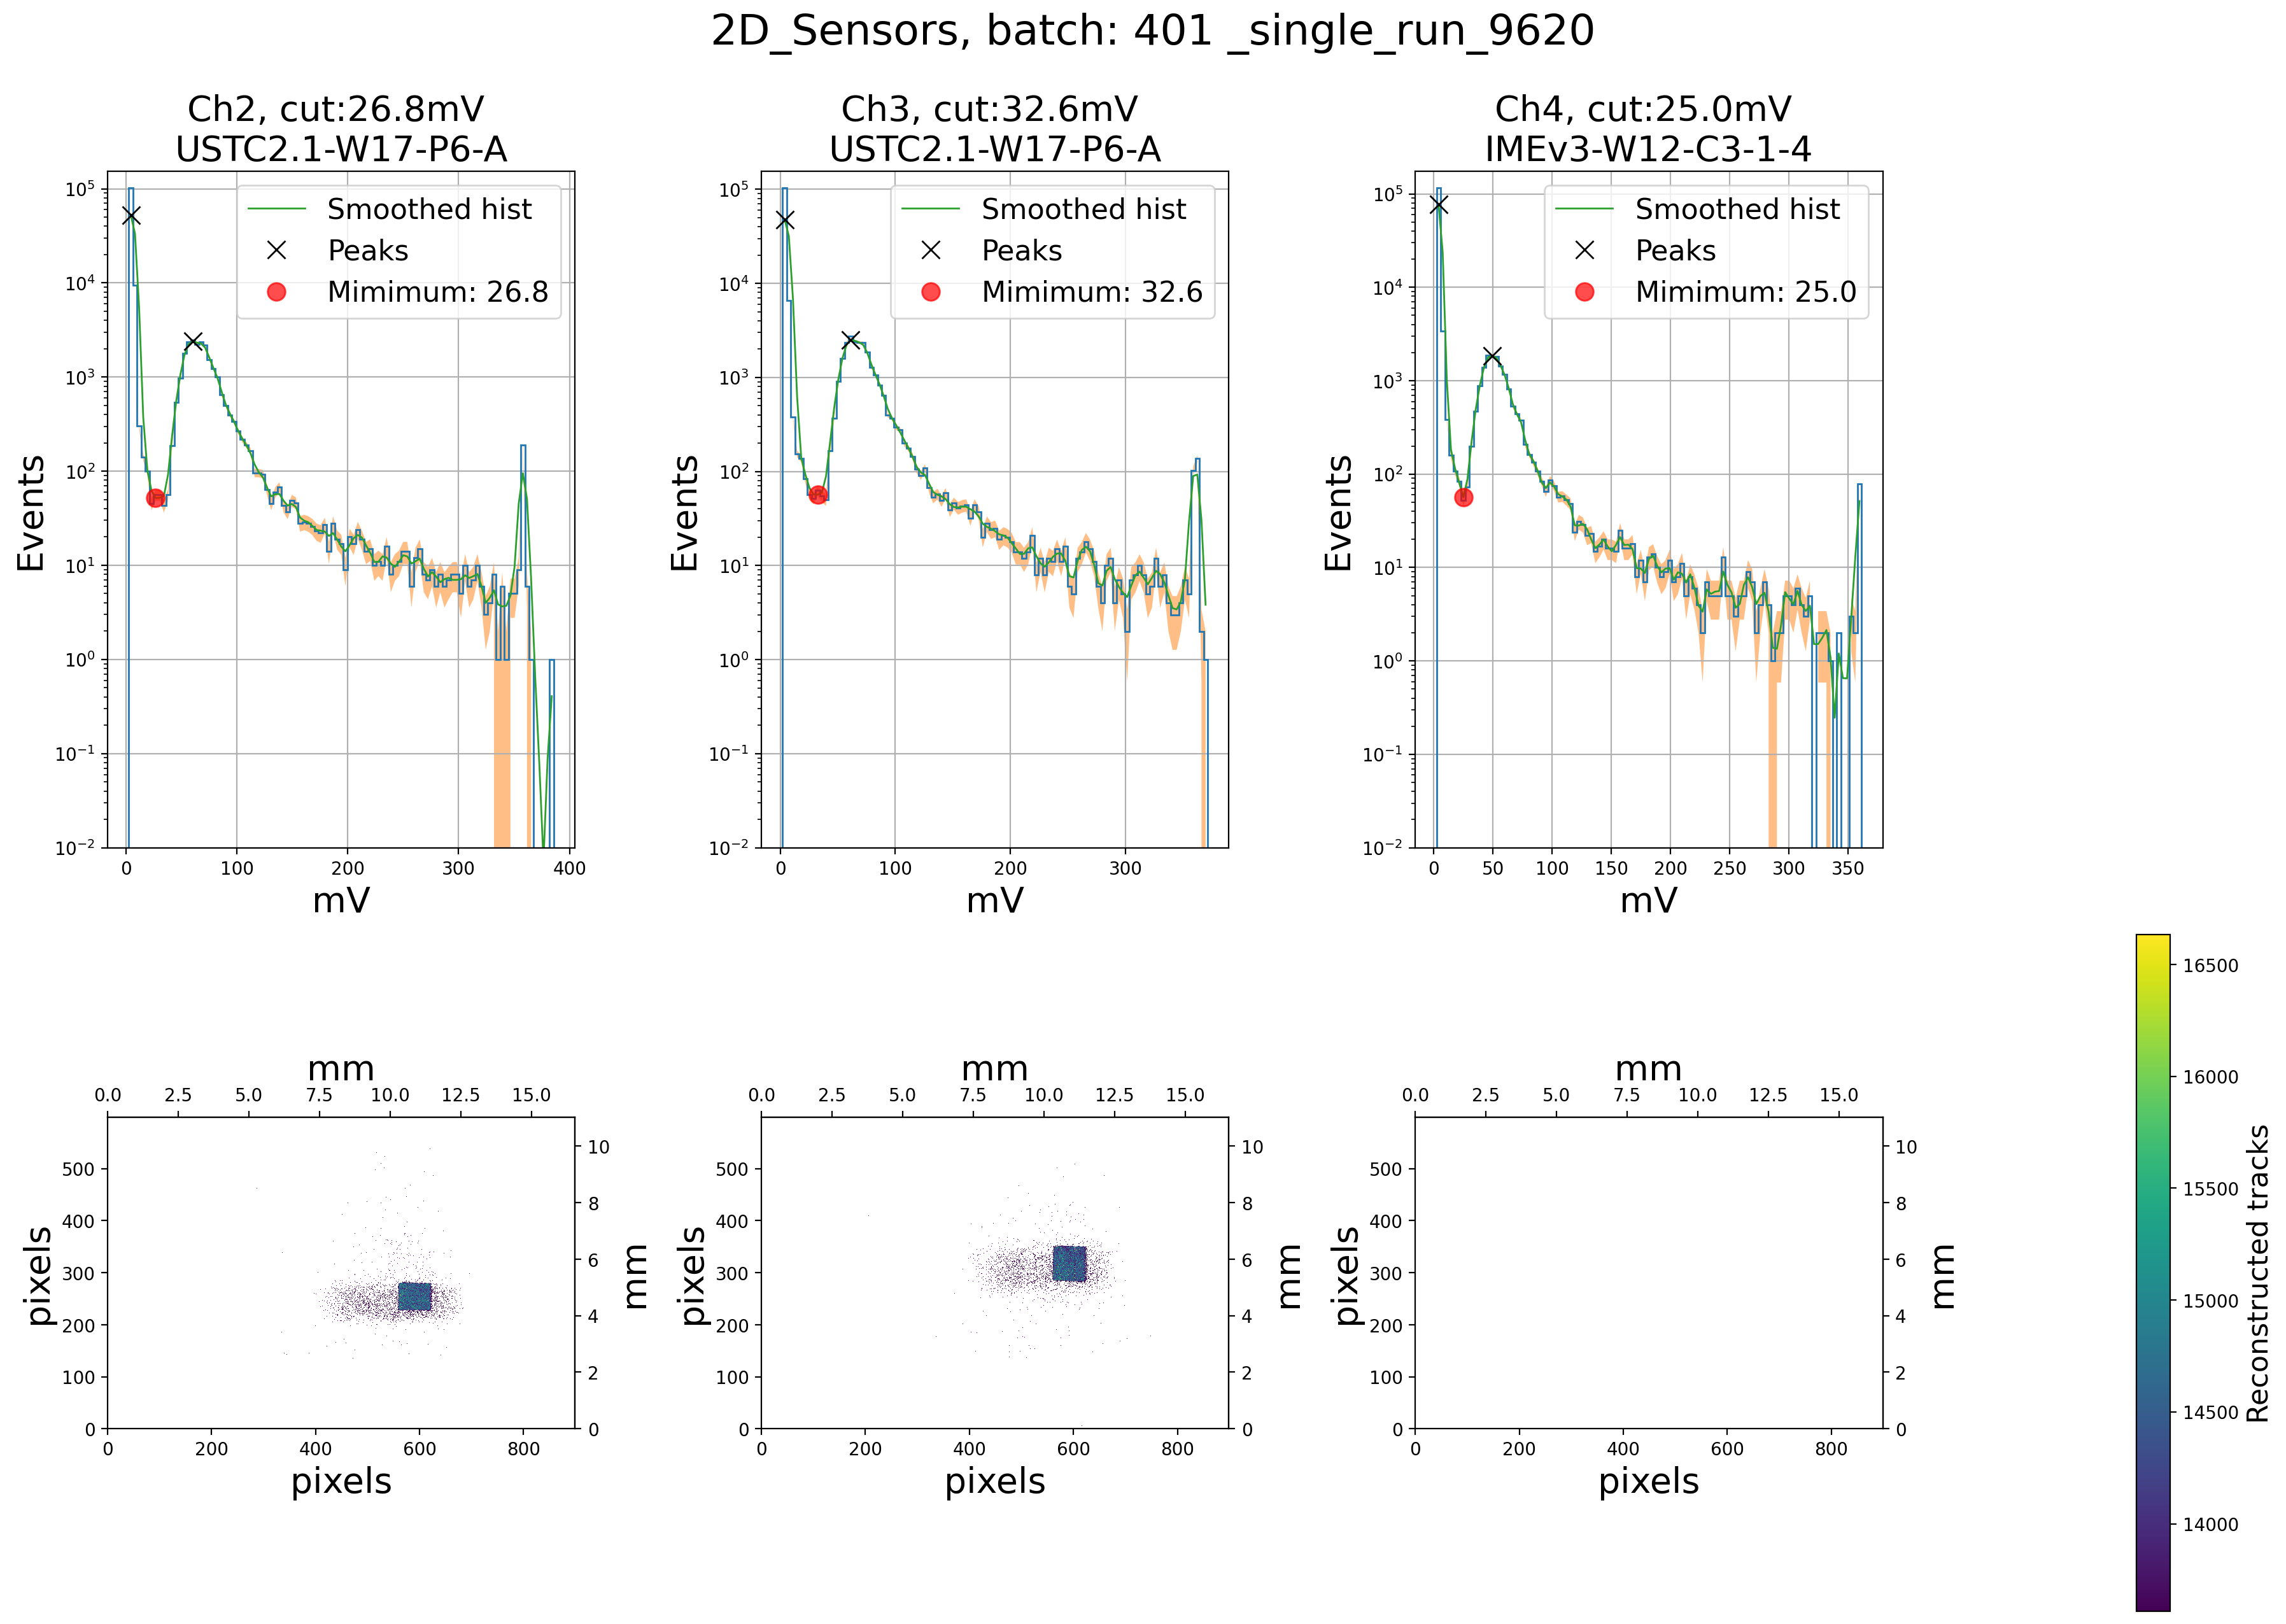

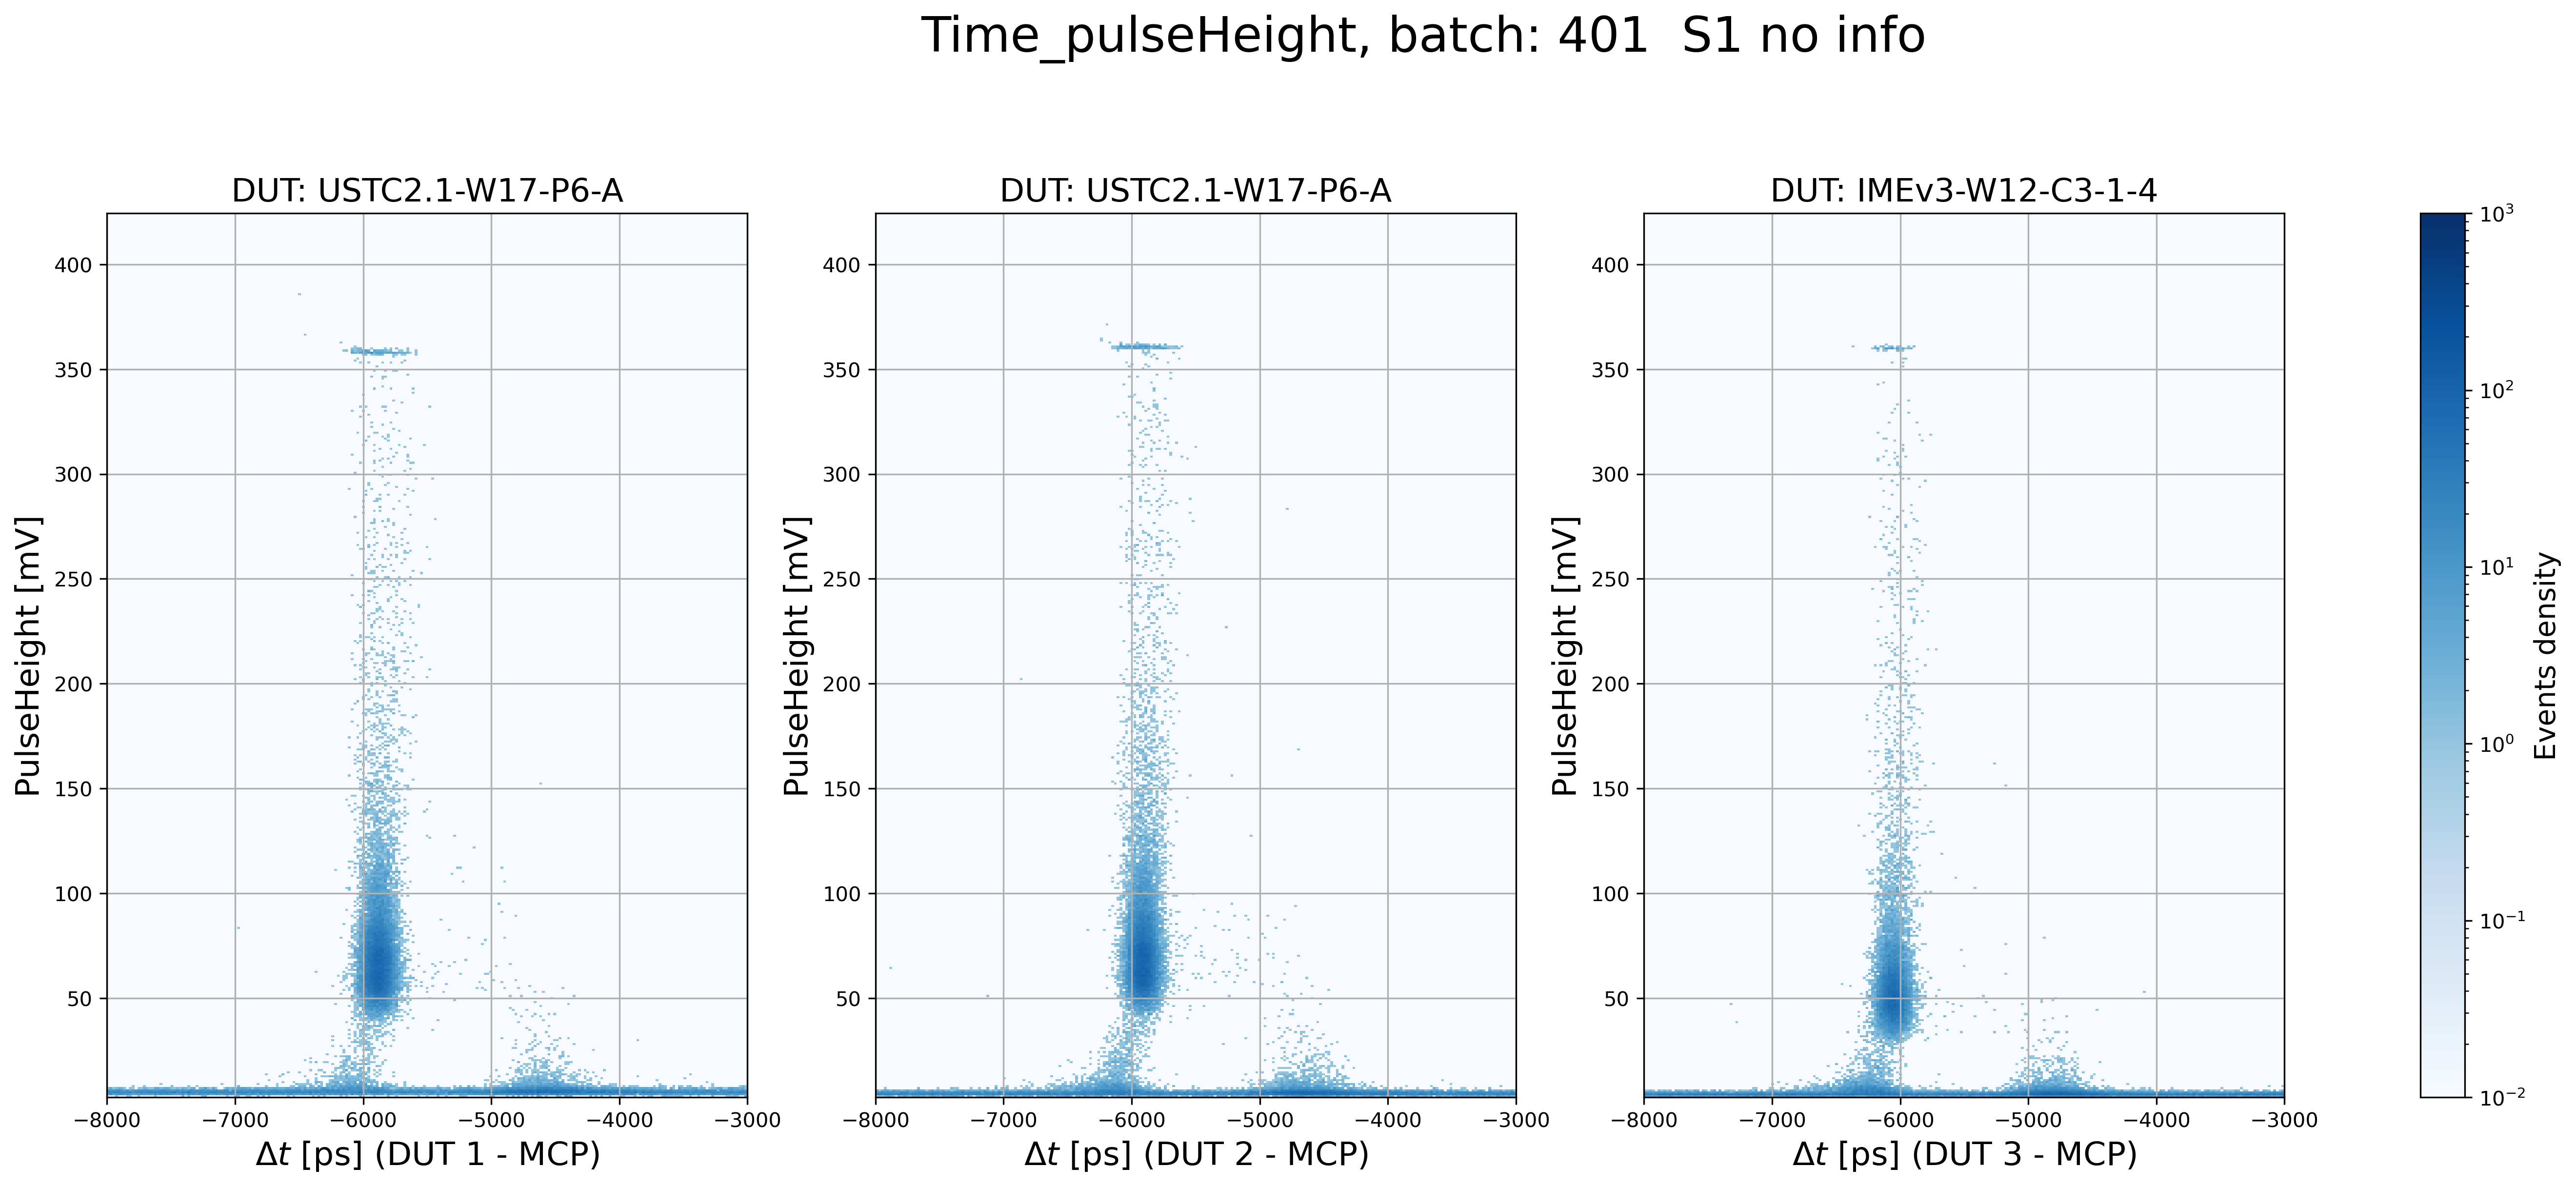

In [10]:
### looking at single runs 
S_run = 'S1'
dir_path = f"/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Data_TestBeam/2023_May/{S_run}/"
run = 9620
DUTs = [1,2,3]


time_bins = 2000


if run>9999:    file_path = f"tree0{run}.root"
elif run<=9999: file_path = f"tree00{run}.root"

### branches to be loaded (+ unnecessary columns)
branches = ["eventNumber", "Xtr", "Ytr", "pulseHeight", "charge", "noise", "pedestal", "timeCFD20", "timeCFD50", "timeCFD70"]
columns_to_remove = ["Xtr_4","Xtr_5","Xtr_6","Xtr_7","Ytr_4","Ytr_5","Ytr_6","Ytr_7"]

try:
    df_run = root_to_df(os.path.join(dir_path, file_path), branches)
except FileNotFoundError:
    logging.error("Run file not found")

df_run = root_to_df(os.path.join(dir_path, file_path), branches)
df_run = df_run.drop(columns=columns_to_remove)
    
plot(df_run,"2D_Sensors", dict_of_batches[this_batch], S_run, bins=large_bins, n_DUT=DUTs,
    savefig=False, savefig_details=f"_single_run_{run}")
plot(df_run, "Time_pulseHeight", dict_of_batches[this_batch], S_run, bins=time_bins, info=False, extra_info=False,
     n_DUT=DUTs, savefig=False, savefig_details=f' {S_run} no info', savefig_path=dir_path, fmt='png') 
# plot(df["S2"],"2D_Tracks", batch=this_batch, sensors=sensors_list[this_batch]["S2"], bins=bins)

In [12]:
df_run

,eventNumber,Xtr_0,Xtr_1,Xtr_2,Xtr_3,Ytr_0,Ytr_1,Ytr_2,Ytr_3,pulseHeight_0,pulseHeight_1,pulseHeight_2,pulseHeight_3,charge_0,charge_1,charge_2,charge_3,noise_0,noise_1,noise_2,noise_3,pedestal_0,pedestal_1,pedestal_2,pedestal_3,timeCFD20_0,timeCFD20_1,timeCFD20_2,timeCFD20_3,timeCFD50_0,timeCFD50_1,timeCFD50_2,timeCFD50_3,timeCFD70_0,timeCFD70_1,timeCFD70_2,timeCFD70_3
0,3,593.663359,593.844618,595.163096,9.535467e-322,409.875968,410.050740,411.322029,4.001932e-322,3.840825,4.217597,4.472528,5.437468,1953.656372,1142.349243,3880.354004,656.577209,0.510084,1.823467,1.207302,1.357652,0.860424,3.313018,1.280870,1.898567,27919.384766,259.722900,30608.773438,47833.718750,28045.021484,302.130096,30954.398438,48271.808594,28105.445312,330.401520,30988.875000,48322.312500
1,7,621.619489,622.196185,626.391061,9.535467e-322,336.305476,336.077947,334.422908,4.001932e-322,2.568430,5.367434,107.975777,4.712911,1998.566895,9769.394531,129469.765625,-2533.707275,0.435782,1.506042,1.661873,1.196544,0.973088,3.577182,1.615204,2.143143,25392.845703,36898.347656,19634.101562,28847.021484,25528.253906,36988.054688,19873.279297,29086.671875,25678.740234,37356.132812,20017.548828,29121.521484
2,10,508.749067,509.133355,511.928649,9.535467e-322,431.335453,431.392248,431.805373,4.001932e-322,3.767003,5.117027,5.304798,5.080982,3822.586182,-327.488861,1897.879395,11665.051758,0.463473,2.013320,1.795136,1.527450,0.942032,3.782185,1.382620,1.437785,20616.603516,7367.391602,28081.486328,12367.961914,20930.423828,7523.033691,28164.658203,12587.684570,21056.488281,7583.555664,28210.400391,12663.425781
3,12,597.393637,597.757033,600.400364,9.535467e-322,278.820755,278.735617,278.116324,4.001932e-322,3.597363,117.392426,6.225771,4.669010,3791.946777,157171.546875,5215.437988,4276.731445,0.455432,2.077276,1.244679,1.332148,1.051997,3.199148,1.110264,1.480044,32190.958984,26495.214844,33649.328125,15498.753906,32294.193359,26775.501953,33712.929688,15814.760742,32371.828125,26945.189453,33752.187500,15857.608398
4,14,525.406754,525.601753,527.020168,9.535467e-322,397.778449,397.904325,398.819947,4.001932e-322,4.053494,5.976208,5.387348,44.090370,2584.730713,6972.565430,-350.410614,57860.082031,0.465245,1.785963,1.602045,1.397270,0.987632,3.214873,1.442763,1.151016,28625.121094,10005.023438,347.710541,22812.306641,28759.988281,10346.812500,32.891815,23054.888672,28974.126953,10397.717773,82.038971,23168.746094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136147,317431,516.108776,516.372497,518.290801,9.535467e-322,335.072941,335.144629,335.666080,4.001932e-322,3.521129,5.309570,4.513150,3.732975,2601.850342,-424.072937,1744.769165,-2237.732666,0.495937,2.392965,1.798586,1.022393,0.988130,4.620936,1.836980,1.942594,30248.662109,369.627380,24271.457031,9587.068359,30425.603516,303.074615,24426.097656,9666.915039,30571.083984,258.706085,24539.027344,9709.705078
136148,317432,558.338109,558.199057,557.187597,9.535467e-322,390.154903,390.169582,390.276360,4.001932e-322,3.702454,4.797306,4.889683,53.821053,2001.138672,-6780.056152,5046.293945,56131.820312,0.529205,2.390575,1.475916,1.457287,0.962474,4.789446,1.473425,2.310670,30324.609375,7074.806152,36518.671875,24474.988281,30607.431641,7150.679199,36625.023438,24725.685547,30687.818359,7195.915527,36704.796875,24848.080078
136149,317433,538.073889,538.160546,538.790882,9.535467e-322,334.835718,334.676758,333.520487,4.001932e-322,5.656282,5.100446,4.025697,4.074774,3234.162109,9143.859375,2274.588623,7964.187012,0.391113,1.695340,1.217337,1.404577,0.850728,3.552286,1.688780,1.860240,27304.312500,24642.425781,35300.367188,36122.855469,27469.986328,24740.181641,35701.488281,36176.550781,27584.972656,24798.599609,35734.414062,36218.945312
136150,317434,554.999376,555.024942,555.210908,9.535467e-322,286.872391,286.860154,286.771142,4.001932e-322,4.057005,5.516878,3.616880,4.736108,2137.289062,-6433.873047,-391.01

101570


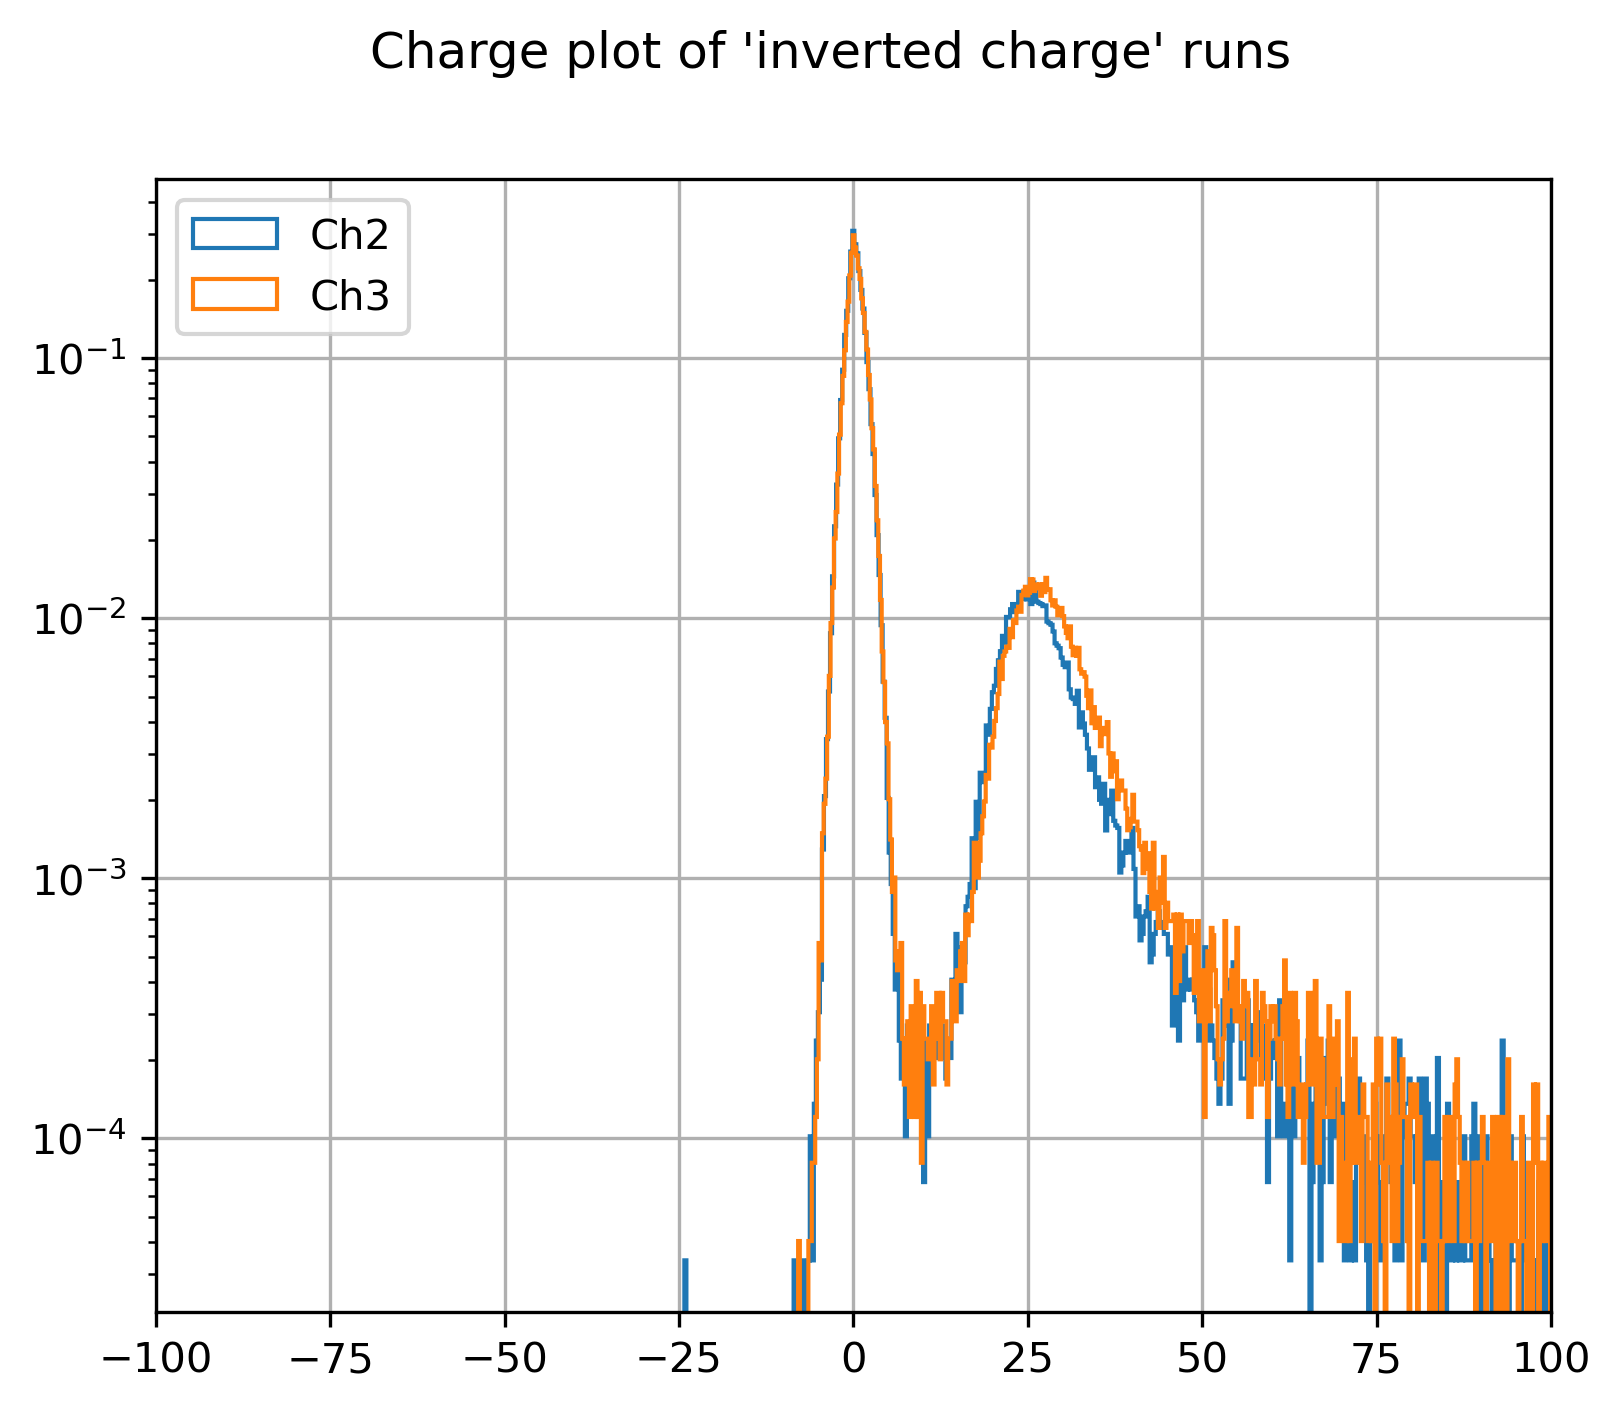

In [23]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, dpi=300)
for dut in DUTs:
    plot_histogram(df_run[f"charge_{dut}"]/4700, bins=2000, fig_ax=(fig,ax), label=f'Ch{dut+1}', density=True)
ax.semilogy()
ax.set_xlim(-100,100)
ax.legend()
fig.suptitle(f"Charge plot of 'inverted charge' runs")
print(df_run["eventNumber"].size)

101570


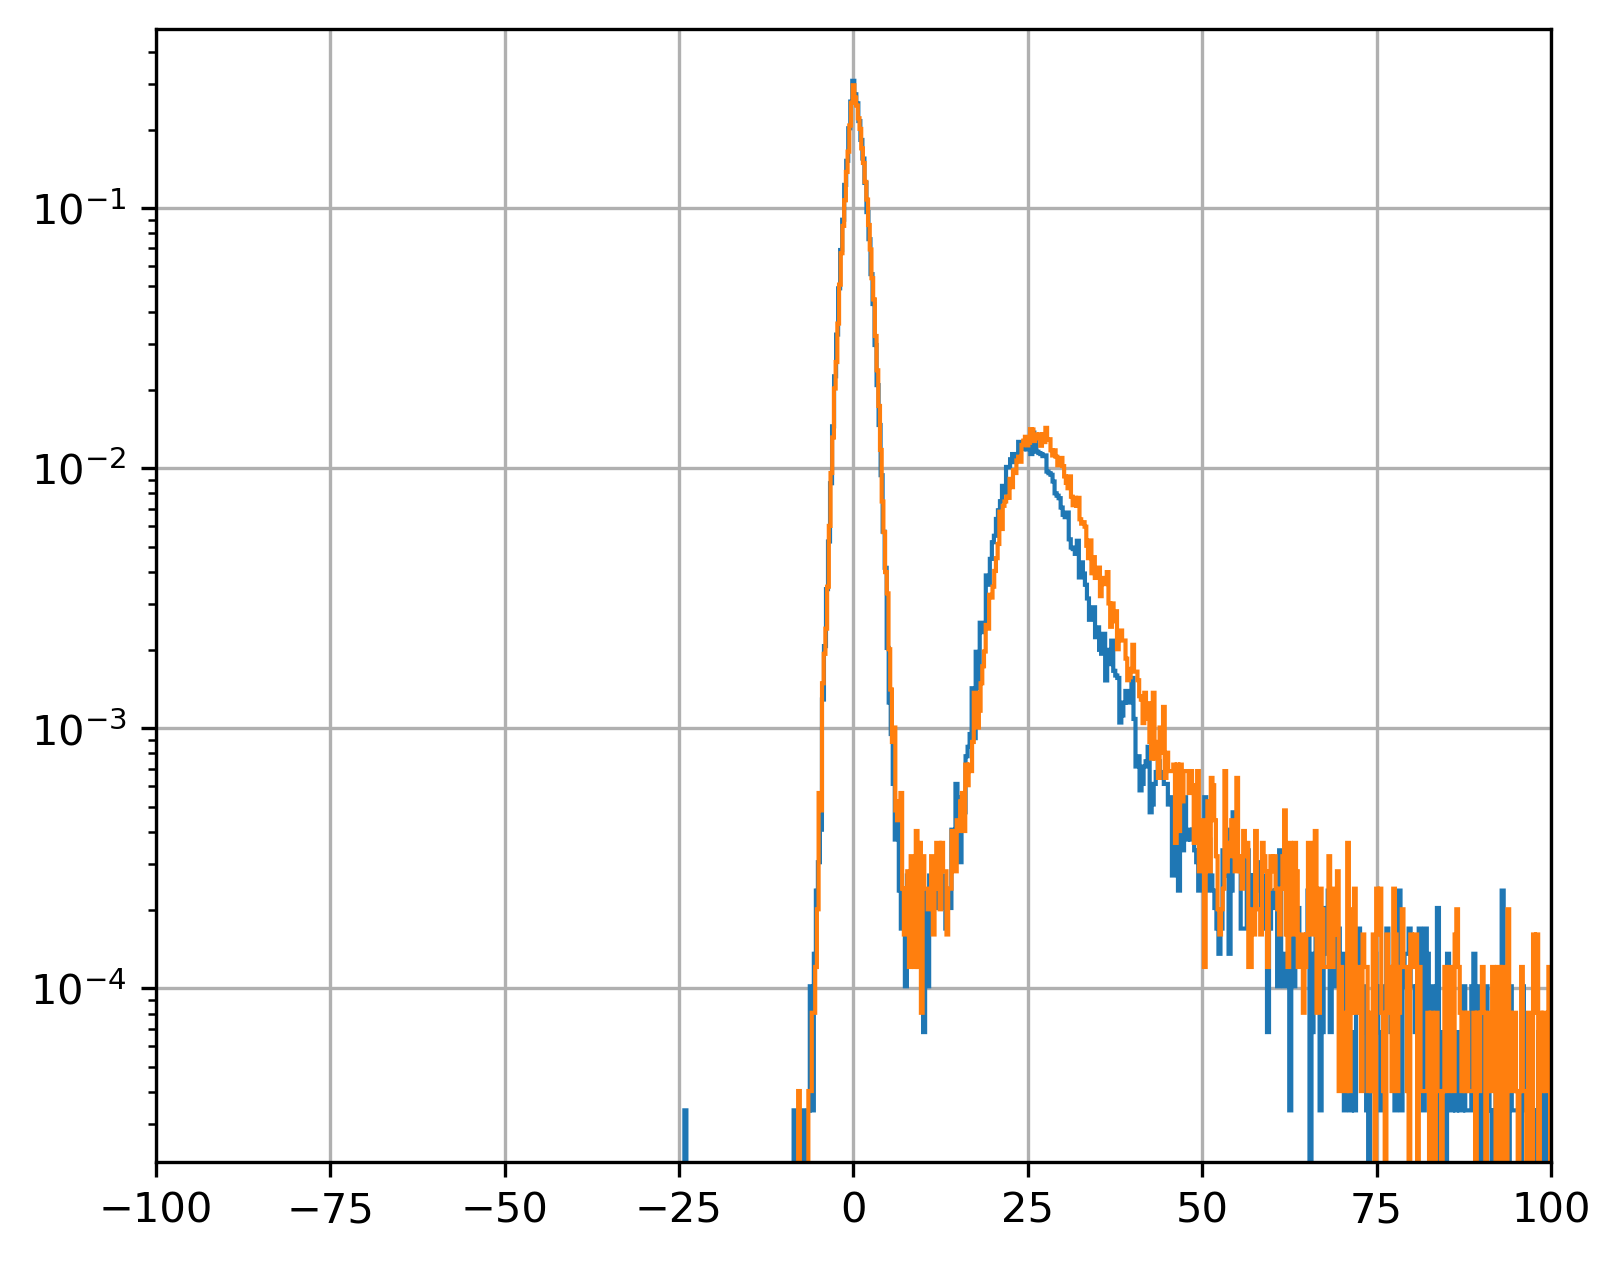

In [24]:
### repeat the same plot so I can quickly compare with the previous run
fig, ax = plt.subplots(figsize=(6,5), ncols=1, dpi=300)
for dut in DUTs:
    plot_histogram(df_run[f"charge_{dut}"]/4700, bins=2000, fig_ax=(fig,ax), density=True)
ax.semilogy()
ax.set_xlim(-100,100)
print(df_run["eventNumber"].size)

(<Figure size 1440x648 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Ch3\nUSTC2.1-W17-P6-A'}, xlabel='pixels', ylabel='pixels'>],
       dtype=object))

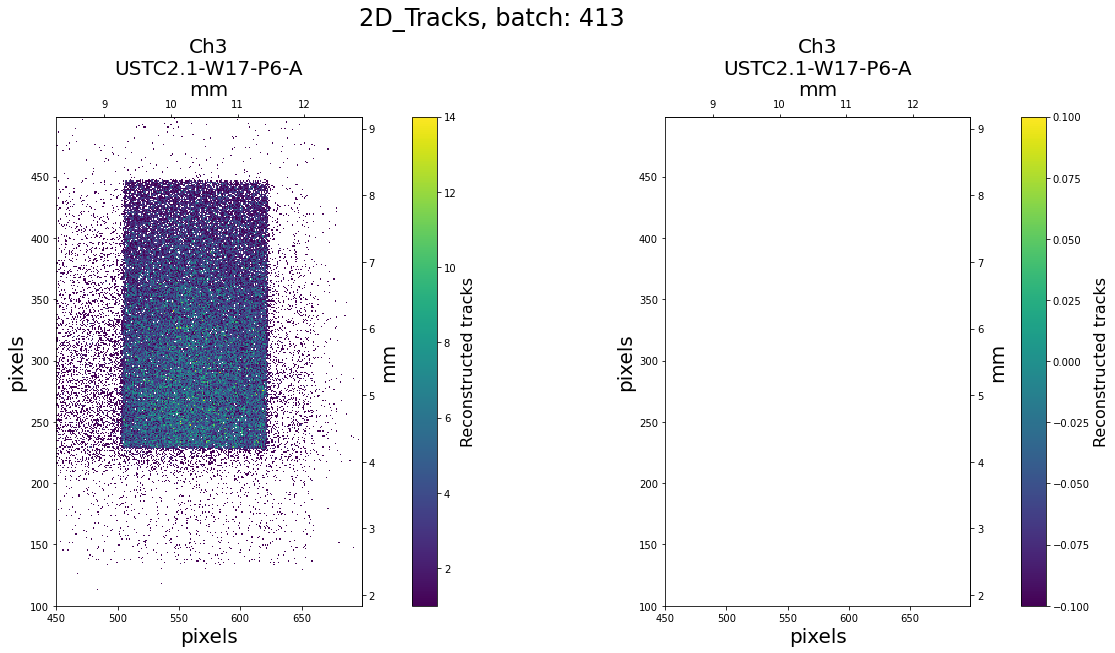

In [26]:
dut = 2
mask = df_run[f"charge_{dut}"]/4700 < -10
fig, axes = plt.subplots(figsize=(20,9), ncols=2)

plot(df_run, "2D_Tracks", dict_of_batches[this_batch], 'S1', bins=bins_dict[this_batch],
                 n_DUT=[dut], savefig=False, fig_ax=(fig,axes[0]))
plot(df_run, "2D_Tracks", dict_of_batches[this_batch], 'S1', bins=bins_dict[this_batch], mask=[mask,mask],
                 n_DUT=[dut], savefig=False, fig_ax=(fig,axes[1]))
# axes[0].set_title("no cuts",fontsize=20)

(<Figure size 1440x648 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Ch2\nUSTC2.1-W17-P6-A'}, xlabel='pixels', ylabel='pixels'>],
       dtype=object))

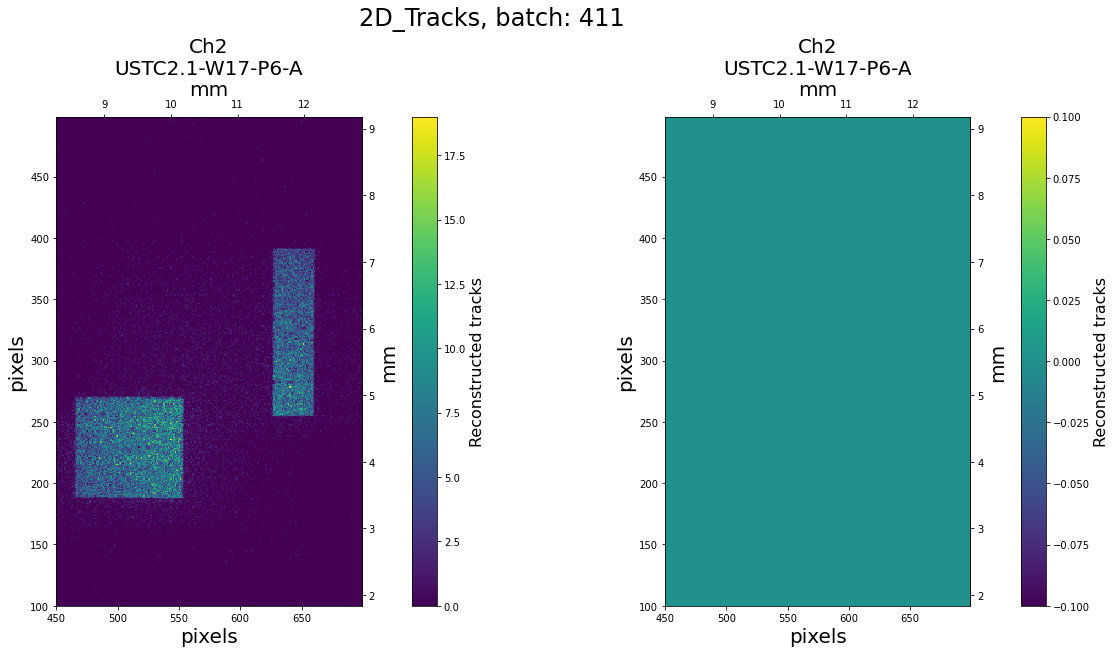

In [15]:
### repeated so I can quickly compare with the previous run
dut = 1
mask = df_run[f"charge_{dut}"]/4700 < -10
fig, axes = plt.subplots(figsize=(20,9), ncols=2)

plot(df_run, "2D_Tracks", dict_of_batches[this_batch], 'S1', bins=bins_dict[this_batch],
                 n_DUT=[dut], savefig=False, fig_ax=(fig,axes[0]))
plot(df_run, "2D_Tracks", dict_of_batches[this_batch], 'S1', bins=bins_dict[this_batch], mask=[mask],
                 n_DUT=[dut], savefig=False, fig_ax=(fig,axes[1]))
# axes[0].set_title("no cuts",fontsize=20)

[]

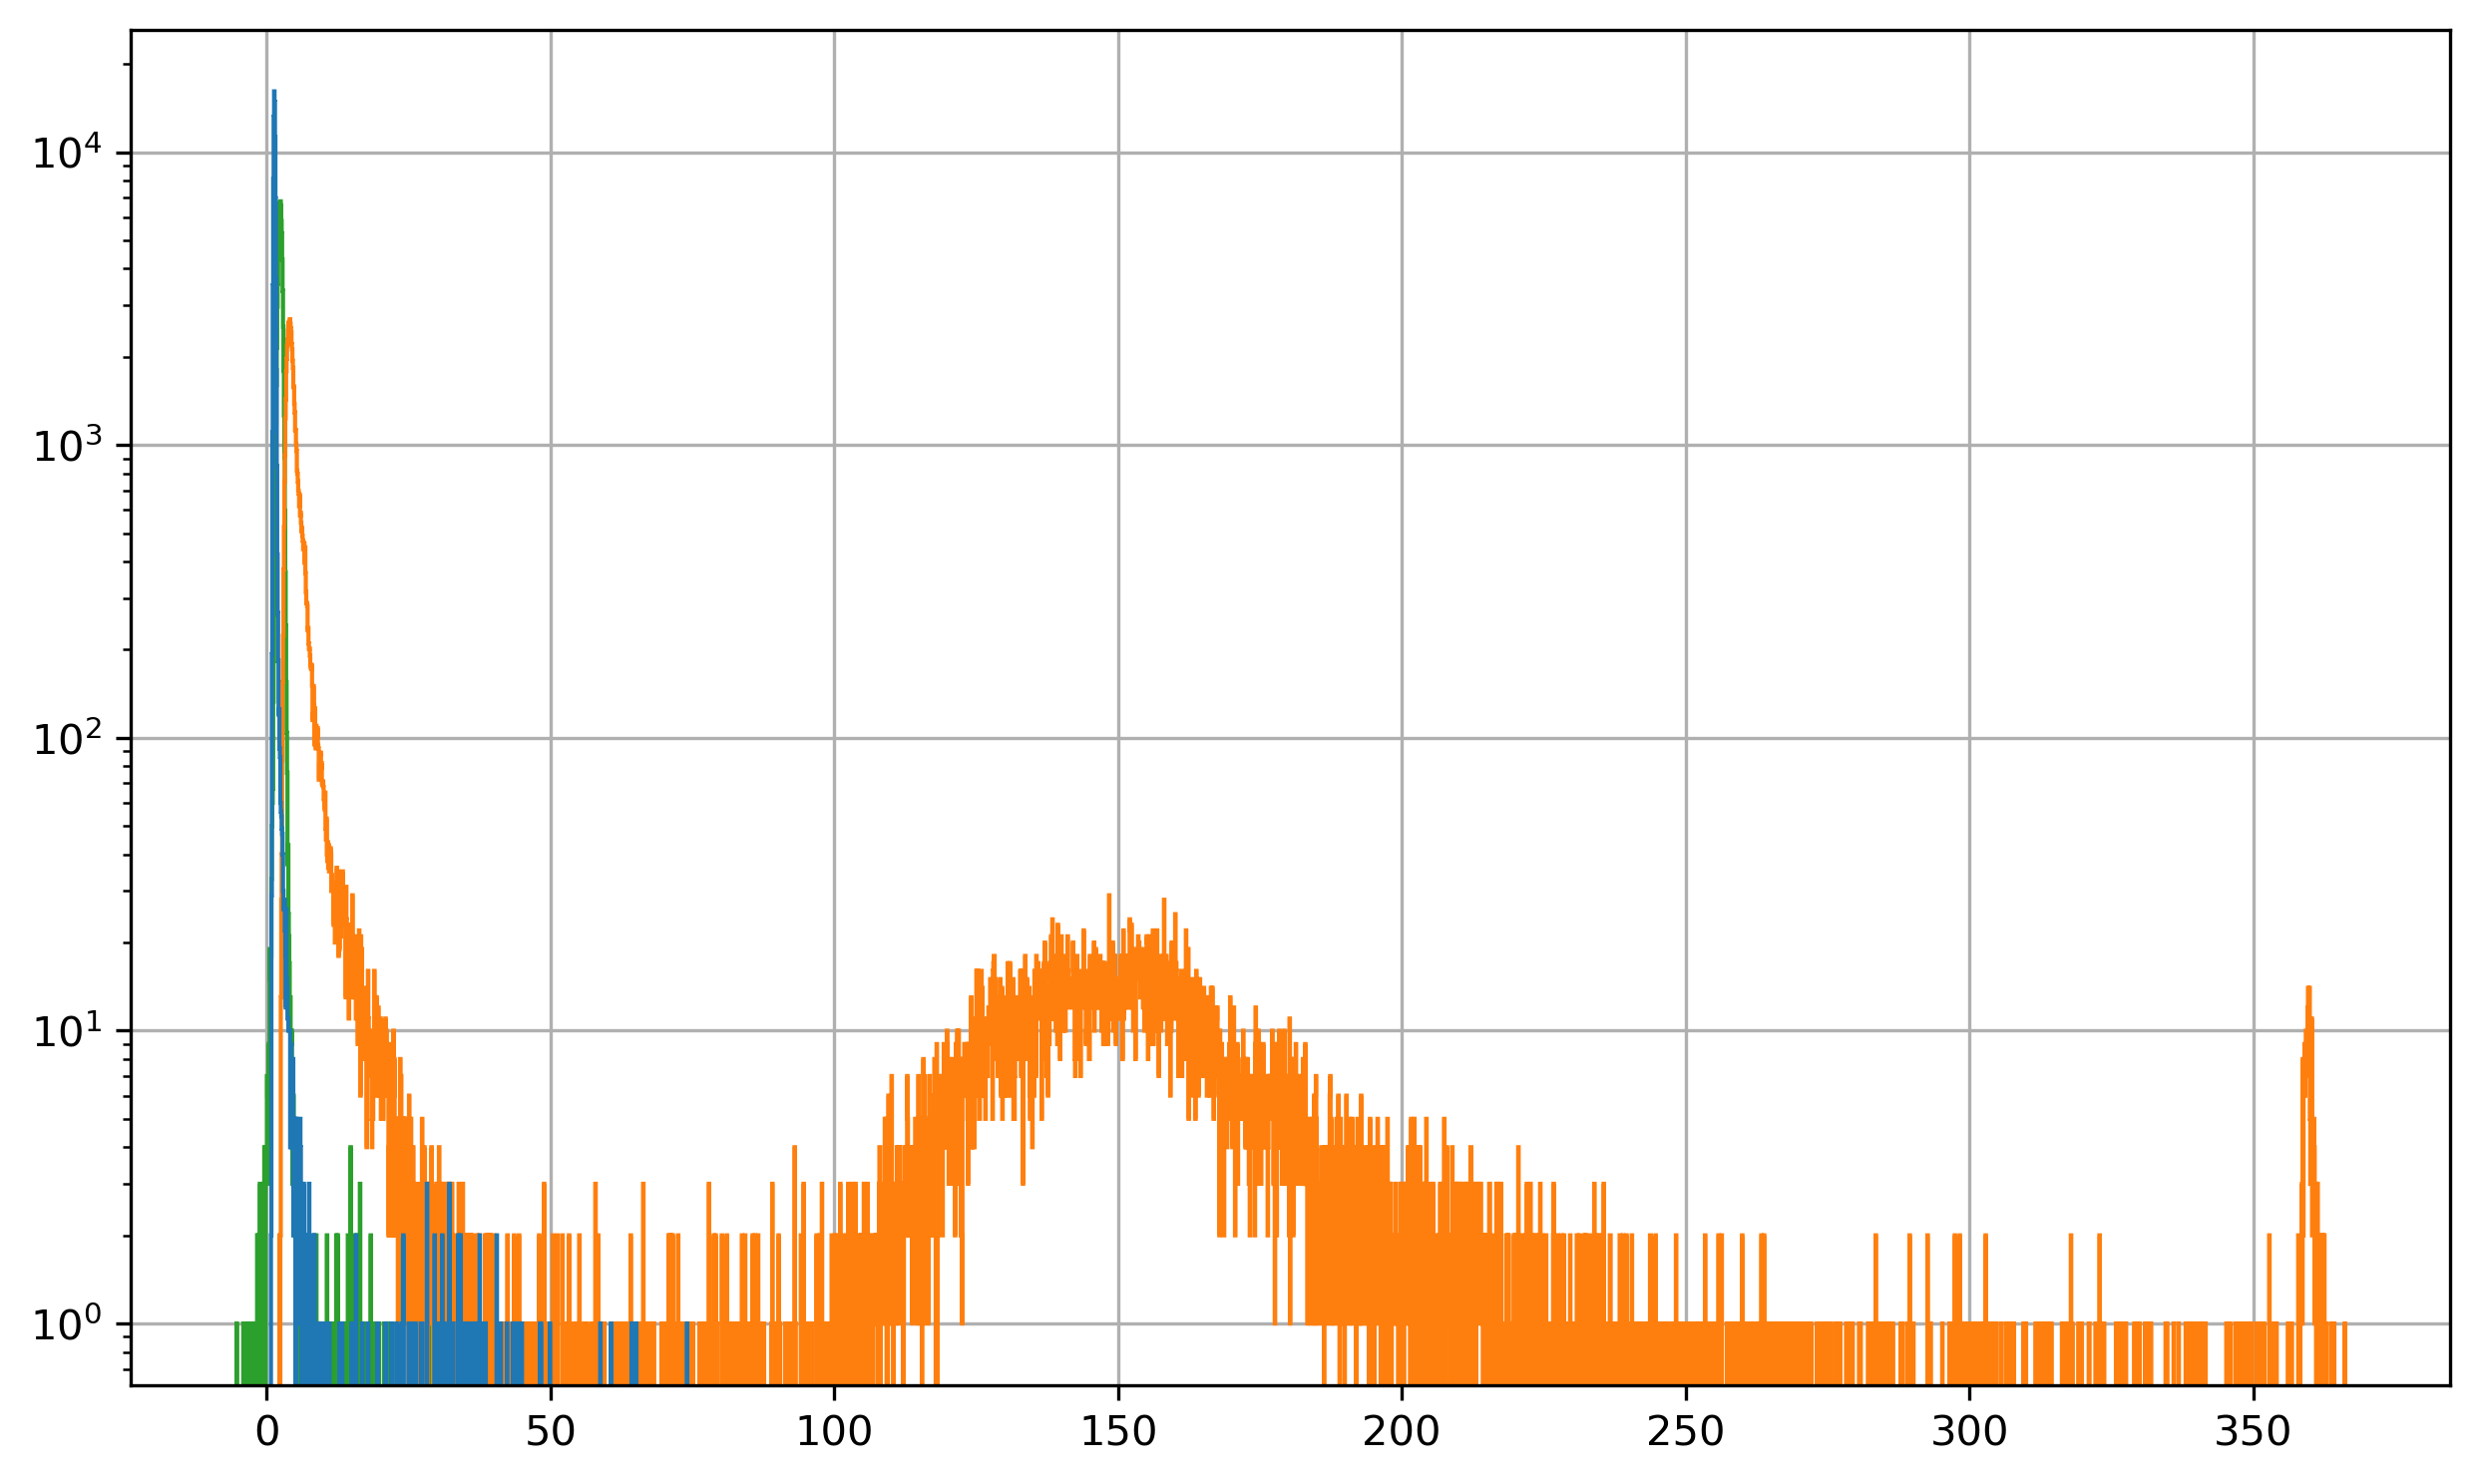

In [16]:
_,_,_,fig, ax = plot_histogram((df_run["noise_3"], df_run["pulseHeight_3"], df_run["pedestal_3"]))
ax.semilogy()
# ax.set_xlim(-2,200)


[]

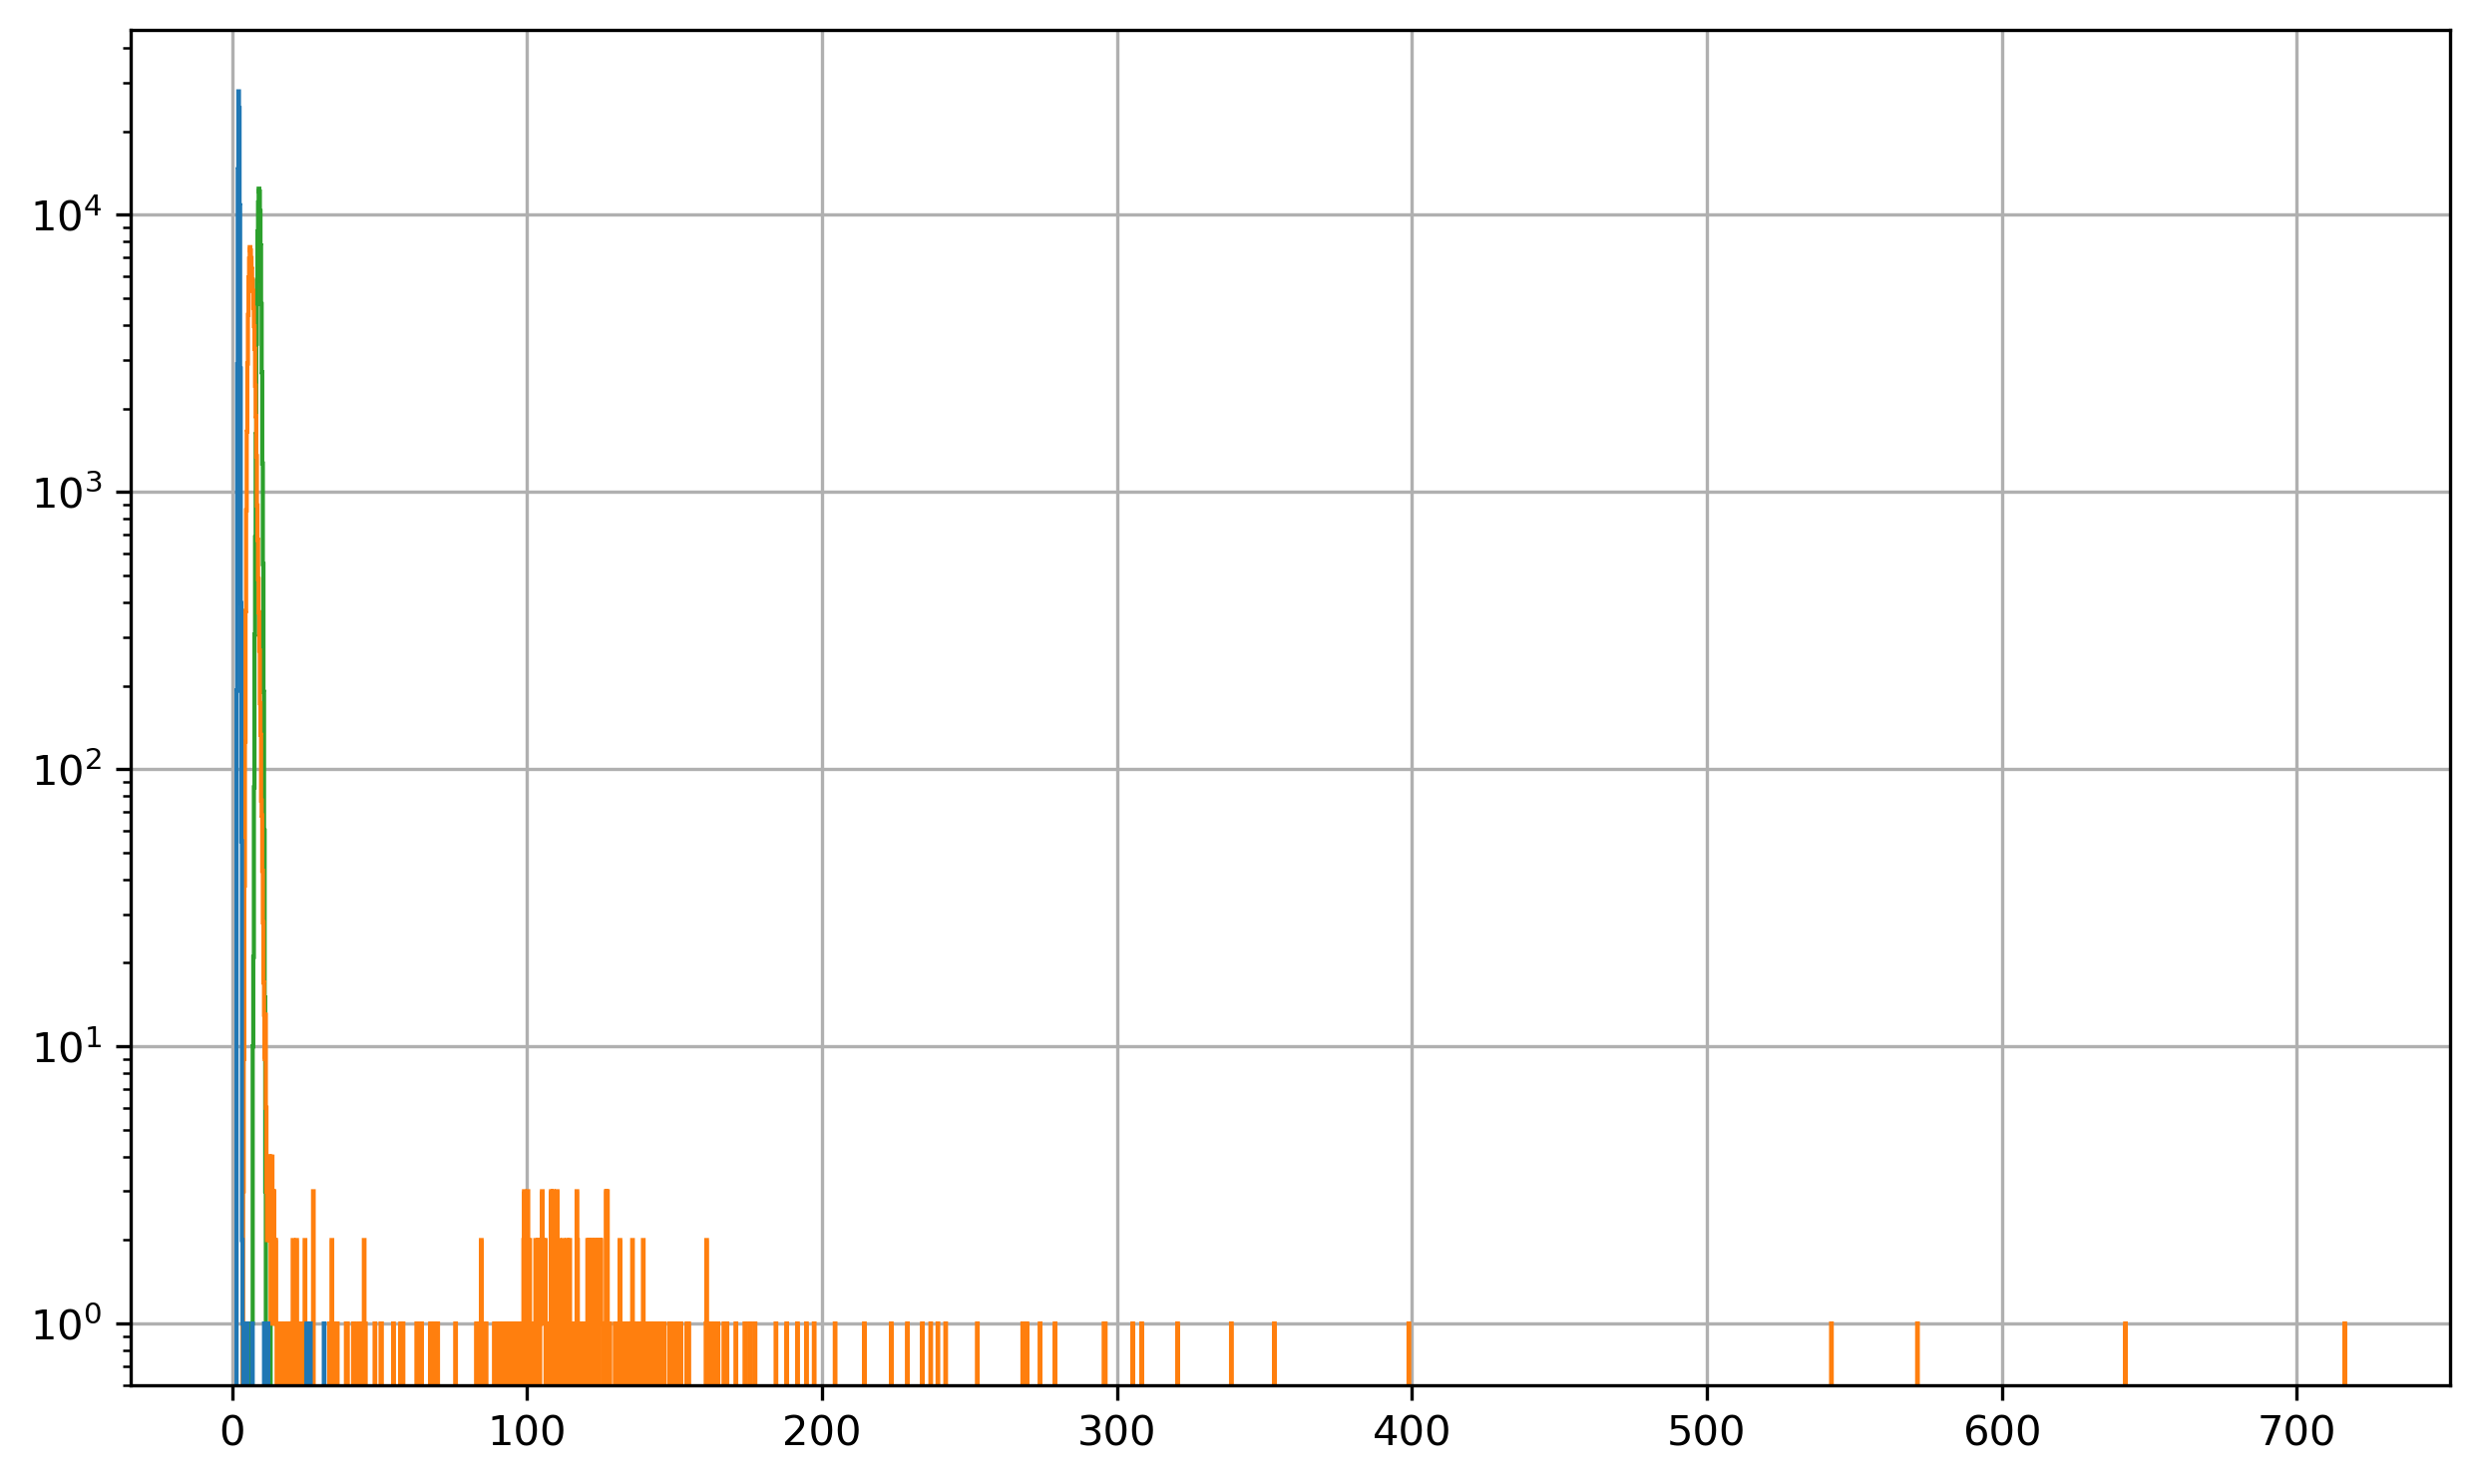

In [17]:
_,_,_,fig, ax = plot_histogram((df_run["noise_1"], df_run["pulseHeight_1"], df_run["pedestal_1"]))
ax.semilogy()
# ax.set_xlim(-2,200)


(0.0, 200.0)

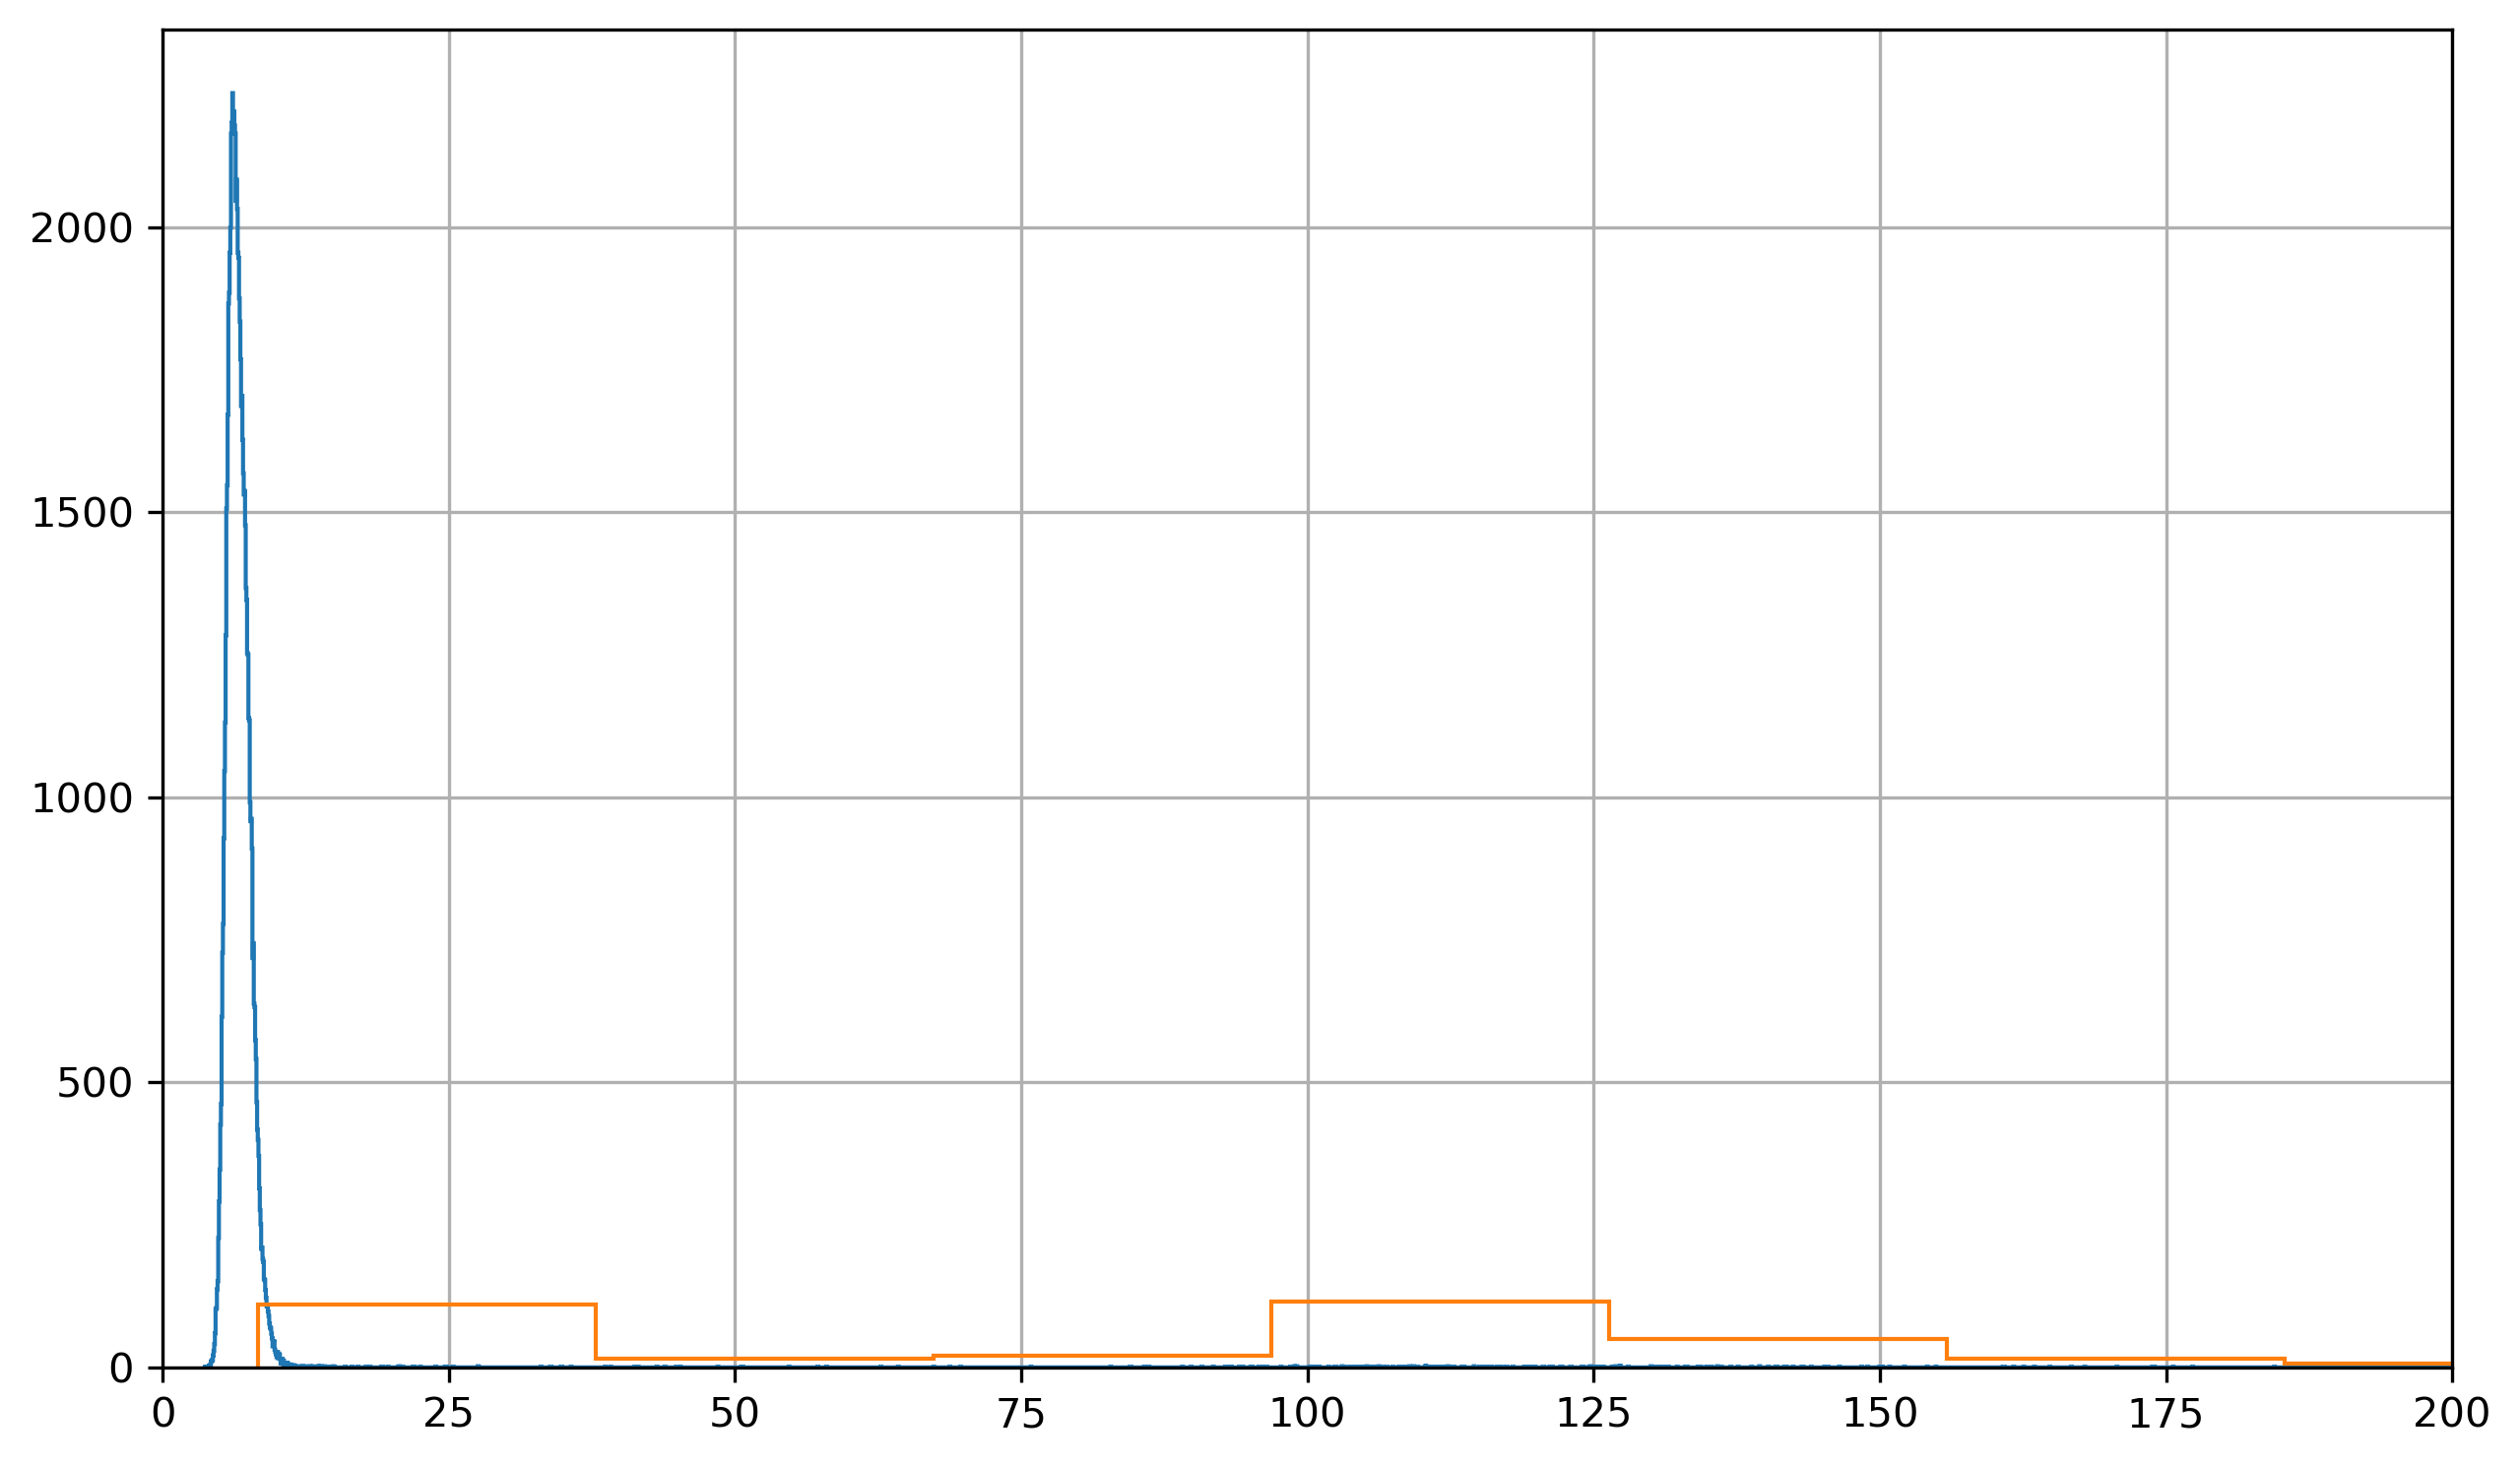

In [18]:
mask = df_run["pulseHeight_1"] > 5*df_run["noise_1"]

_,_,_,fig,ax = plot_histogram(df_run["pulseHeight_1"])
plot_histogram(df_run["pulseHeight_1"].loc[mask], fig_ax=(fig,ax))
ax.set_xlim(0,200)

In [19]:
fig, axes = plot(df[this_scope], "2D_Efficiency", dict_of_batches[this_batch], this_scope, bins=bins, geometry_cut='normal', zoom_to_sensor=True,
                 n_DUT=[1,2,3], threshold_charge=threshold_charge, savefig=False)

NameError: name 'this_scope' is not defined